# Requirements

In [ ]:
%pip install -r requirements.txt

# Codes For Background Run

In [ ]:
# nohup python train_data_gen.py --audio_dir "/data/AAG/MTech_Project_Data/speech_data_filter"  --cnt 2500  --train_dir "train_data" --test_dir "test_data" --output_path "pkl_data"  --target_fs_values 16000 --clipping_thresholds 0.1 0.2 --time_clip 1 --win_len 500  --win_shift 125 --delta 300 --s_ratio 0.9 > logs/data_gen_log.txt 2>&1 &

In [ ]:
# !python segregate.py --audio_dir "/data2/AAG/Ausio_Declip/MTech_Project_Data/speech_data_filter" \
#     --cnt 10 --train_dir "train_data" --test_dir "test_data" --s_ratio 0.9 

In [23]:
# nohup python train_data_gen.py --audio_dir "/data2/AAG/Audio_Declip/train_data" --output_path "pkl_data" --target_fs_values 16000 --clipping_thresholds 0.2 0.4 0.6 0.8 --time_clip 1 --win_len 500 --win_shift 125 --delta 300 --n_files 20 > logs/train_gen.log 2>&1 &

In [ ]:
# nohup python training.py --pkl_path pkl_data/training_data.pkl --epochs 50 --batch_size 128 --save_path saved_models --plot_path loss_plots --checkpoint_freq 50 --val_split 0.2 --resume --val --dft_size 1000 --max_sparsity 500 --mask_size 500 > logs/training_log.log 2>&1 &

In [ ]:
# import pickle

# # Define the file path on the server
# file_path = '/data2/AAG/Audio_Declip/pkl_data/training_data.pkl'

# # Load the .pkl file
# with open(file_path, 'rb') as file:
#     data = pickle.load(file)

# # Extract a small portion of the data (e.g., first 1000 rows if it's a DataFrame or a subset if it's a different structure)
# small_data = data[:10000] if isinstance(data, list) else data

# # Save the small data as a new .pkl file
# small_data_path = '/data2/AAG/Audio_Declip/pkl_data/small_training_data.pkl'
# with open(small_data_path, 'wb') as file:
#     pickle.dump(small_data, file)

# print(f"Small data saved to {small_data_path}")

Small data saved to /data2/AAG/Audio_Declip/pkl_data/small_training_data.pkl


In [19]:
import pickle

# Define the file path on the server
file_path = '/data2/AAG/Audio_Declip/pkl_data/training_data.pkl'

# Load the .pkl file
with open(file_path, 'rb') as file:
    data = pickle.load(file)

In [26]:
len(data[0][0]['masks'])

1500

# Small training 

In [1]:
!python training.py --pkl_path pkl_data/small_training_data.pkl \
    --epochs 50 \
    --batch_size 512 \
    --save_path saved_models \
    --plot_path loss_plots \
    --checkpoint_freq 5 \
    --val \
    --val_split 0.2 \
    --resume 

^C


# Main deployment

In [5]:
!python evaluate.py --model_path "saved_models/final/complex_dft_unet_final.pth" \
    --test_audio_dir "custom_sound" \
    --output_dir "custom_sound_output" \
    --target_fs_values 16000 \
    --clipping_thresholds 0.2 \
    --time_clip 1 \
    --factor 0.2 \
    --eval_mode 0 \
    --dynamic 0 \
    --save 0 \
    --delta 300 \
    --c_win 500 \
    --r_mode 1 

Processing files:   0%|                                   | 0/1 [00:00<?, ?it/s]
Processing: 61-70968-0000.wav (fs=16000, threshold=0.2, duration=1, winlen=500)
Generating clipped signal...
Processing files: 100%|███████████████████████████| 1/1 [00:18<00:00, 19.00s/it]


In [ ]:
# !python plot_loss_history.py --history_file saved_models/loss_history.json --output_path final_plots

# Mid Term plottings

# Experiment 1

In [ ]:
# nohup python evaluate.py --test_audio_dir "/data2/AAG/Audio_Declip/midterm_sounds/Bird_sounds" --output_dir "exp1_new/bird_sound" --target_fs_values 11025 --input_sdrs 1 3 5 7 --time_clip 1 2 4 8 --sdr_mode 1 --pesq_mode 0 --c_win 256 > logs/bird.log 2>&1 &

# nohup python evaluate.py --test_audio_dir "/data2/AAG/Audio_Declip/midterm_sounds/Heart_sounds" --output_dir "exp1_new/heart_sound" --target_fs_values 2000 --input_sdrs 1 3 5 7 --time_clip 1 2 4 8 --sdr_mode 1 --pesq_mode 0 --c_win 512 > logs/heart.log 2>&1 &

# nohup python evaluate.py --test_audio_dir "/data2/AAG/Audio_Declip/midterm_sounds/Lung_sounds" --output_dir "exp1_new/lung_sound" --target_fs_values 4000 --input_sdrs 1 3 5 7 --time_clip 1 2 4 8 --sdr_mode 1 --pesq_mode 0 --c_win 512 > logs/lung.log 2>&1 &

# nohup python evaluate.py --test_audio_dir "/data2/AAG/Audio_Declip/midterm_sounds/Speech_sounds" --output_dir "exp1_new/speech_sound" --target_fs_values 16000 --input_sdrs 1 3 5 7 --time_clip 1 2 4 8 --sdr_mode 1 --pesq_mode 0 --c_win 1024 > logs/speech.log 2>&1 &


In [ ]:
!python evaluate.py --test_audio_dir "/data2/AAG/Audio_Declip/custom_sound" \
    --output_dir "/data2/AAG/Audio_Declip/custom_sound_output" \
    --target_fs_values 44100 \
    --input_sdrs 1 3 5 \
    --time_clip 1 \
    --sdr_mode 1 \
    --pesq_mode 0

### Plotting

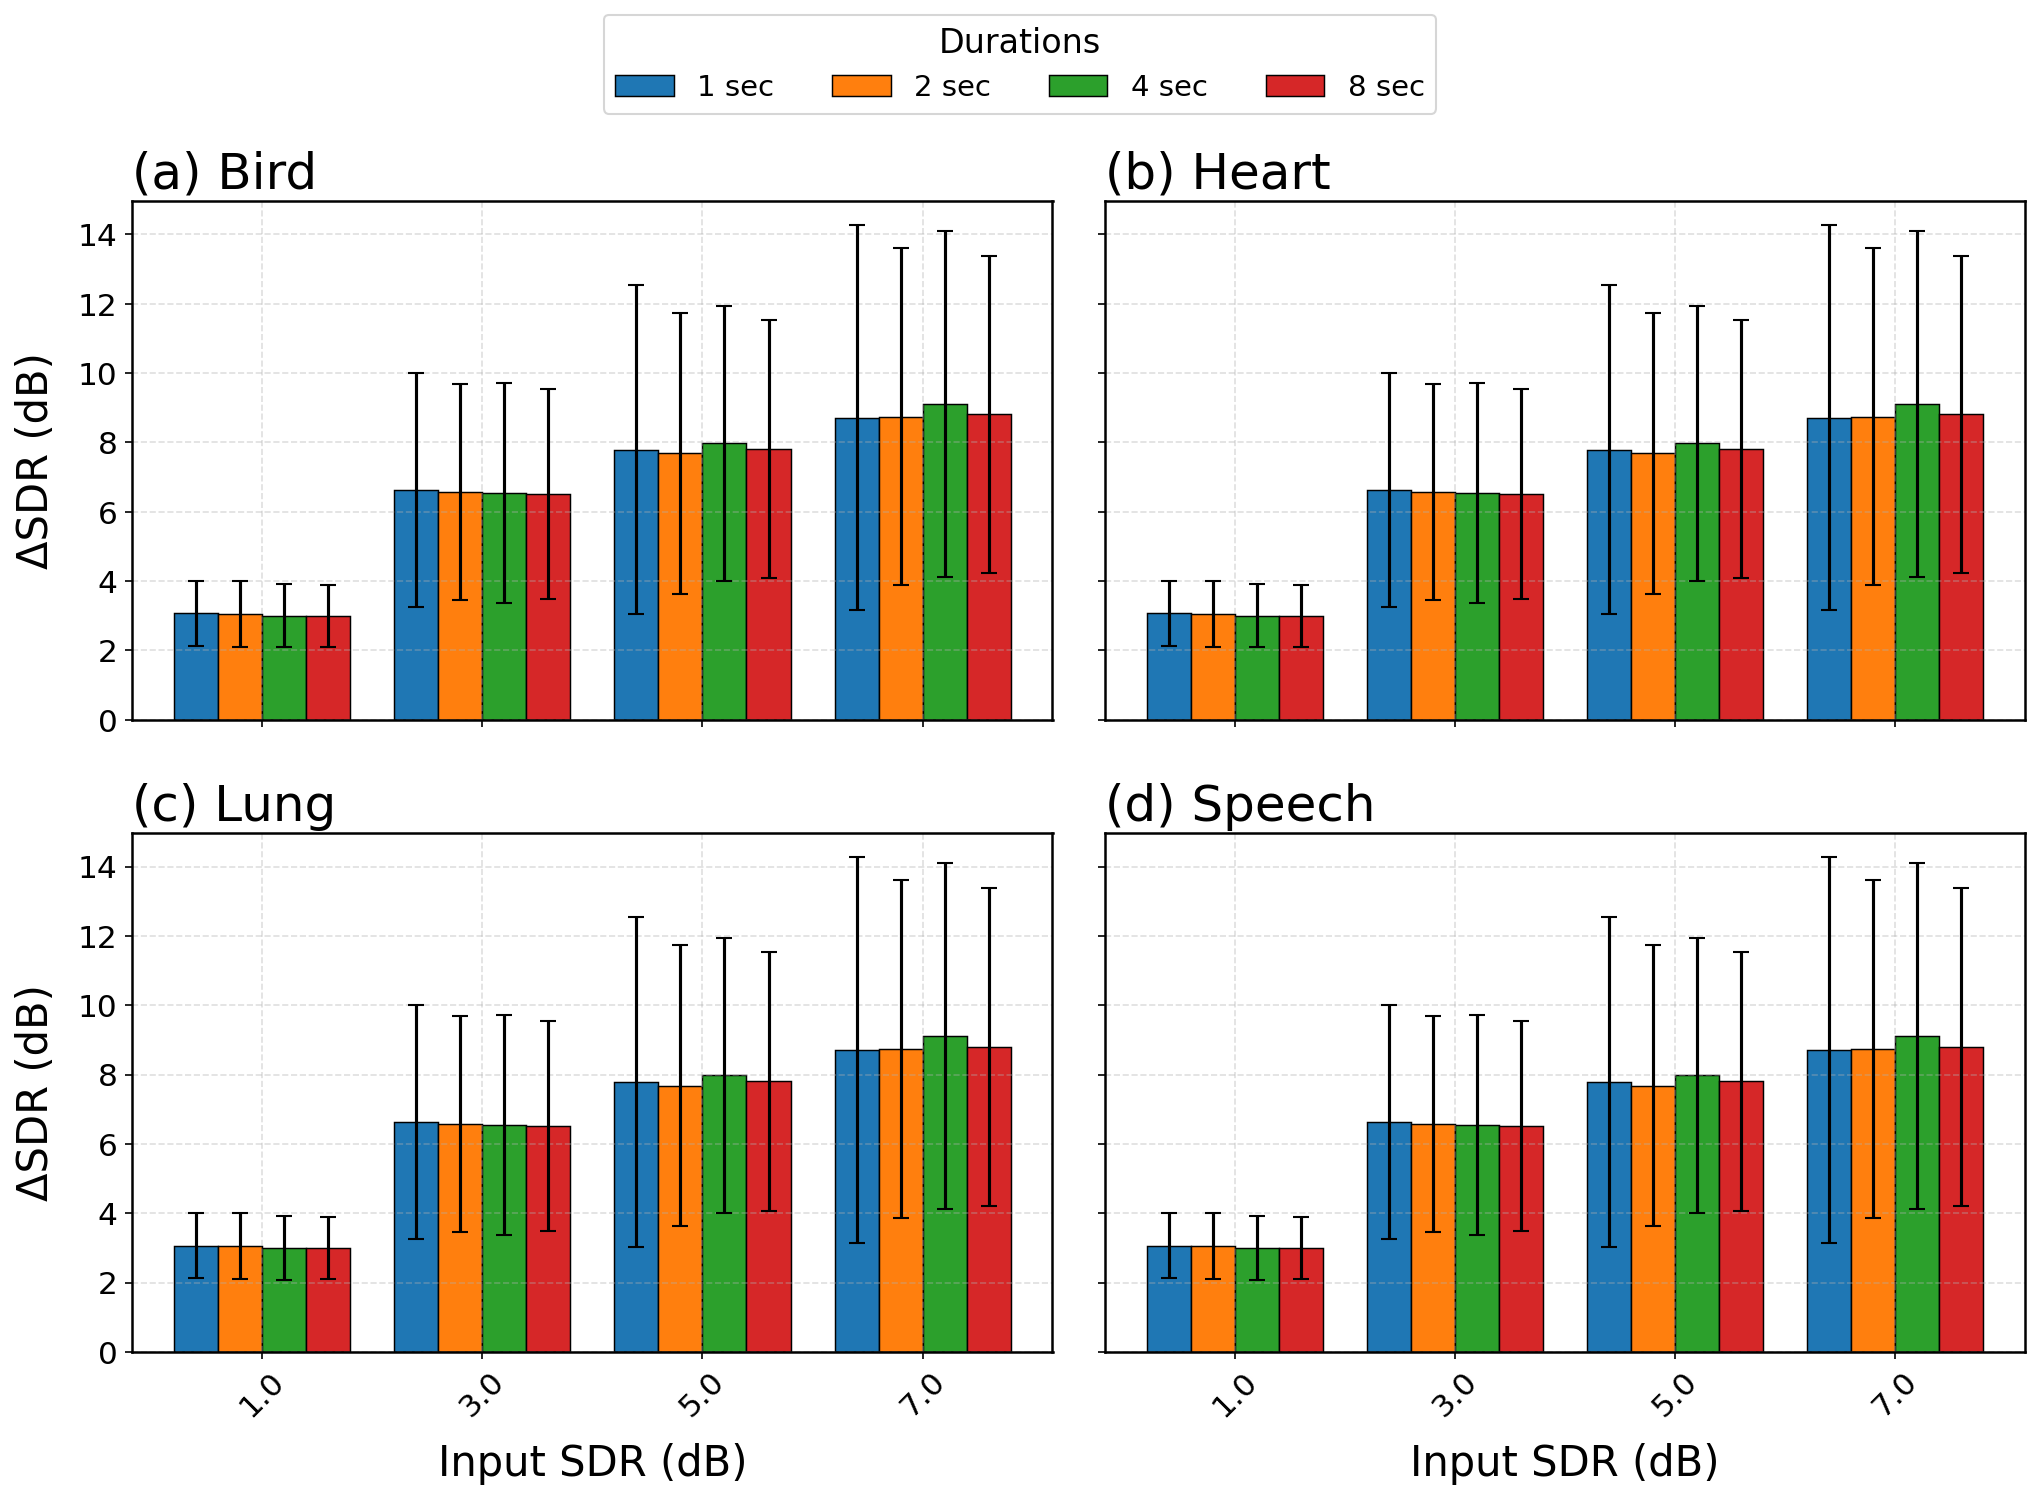

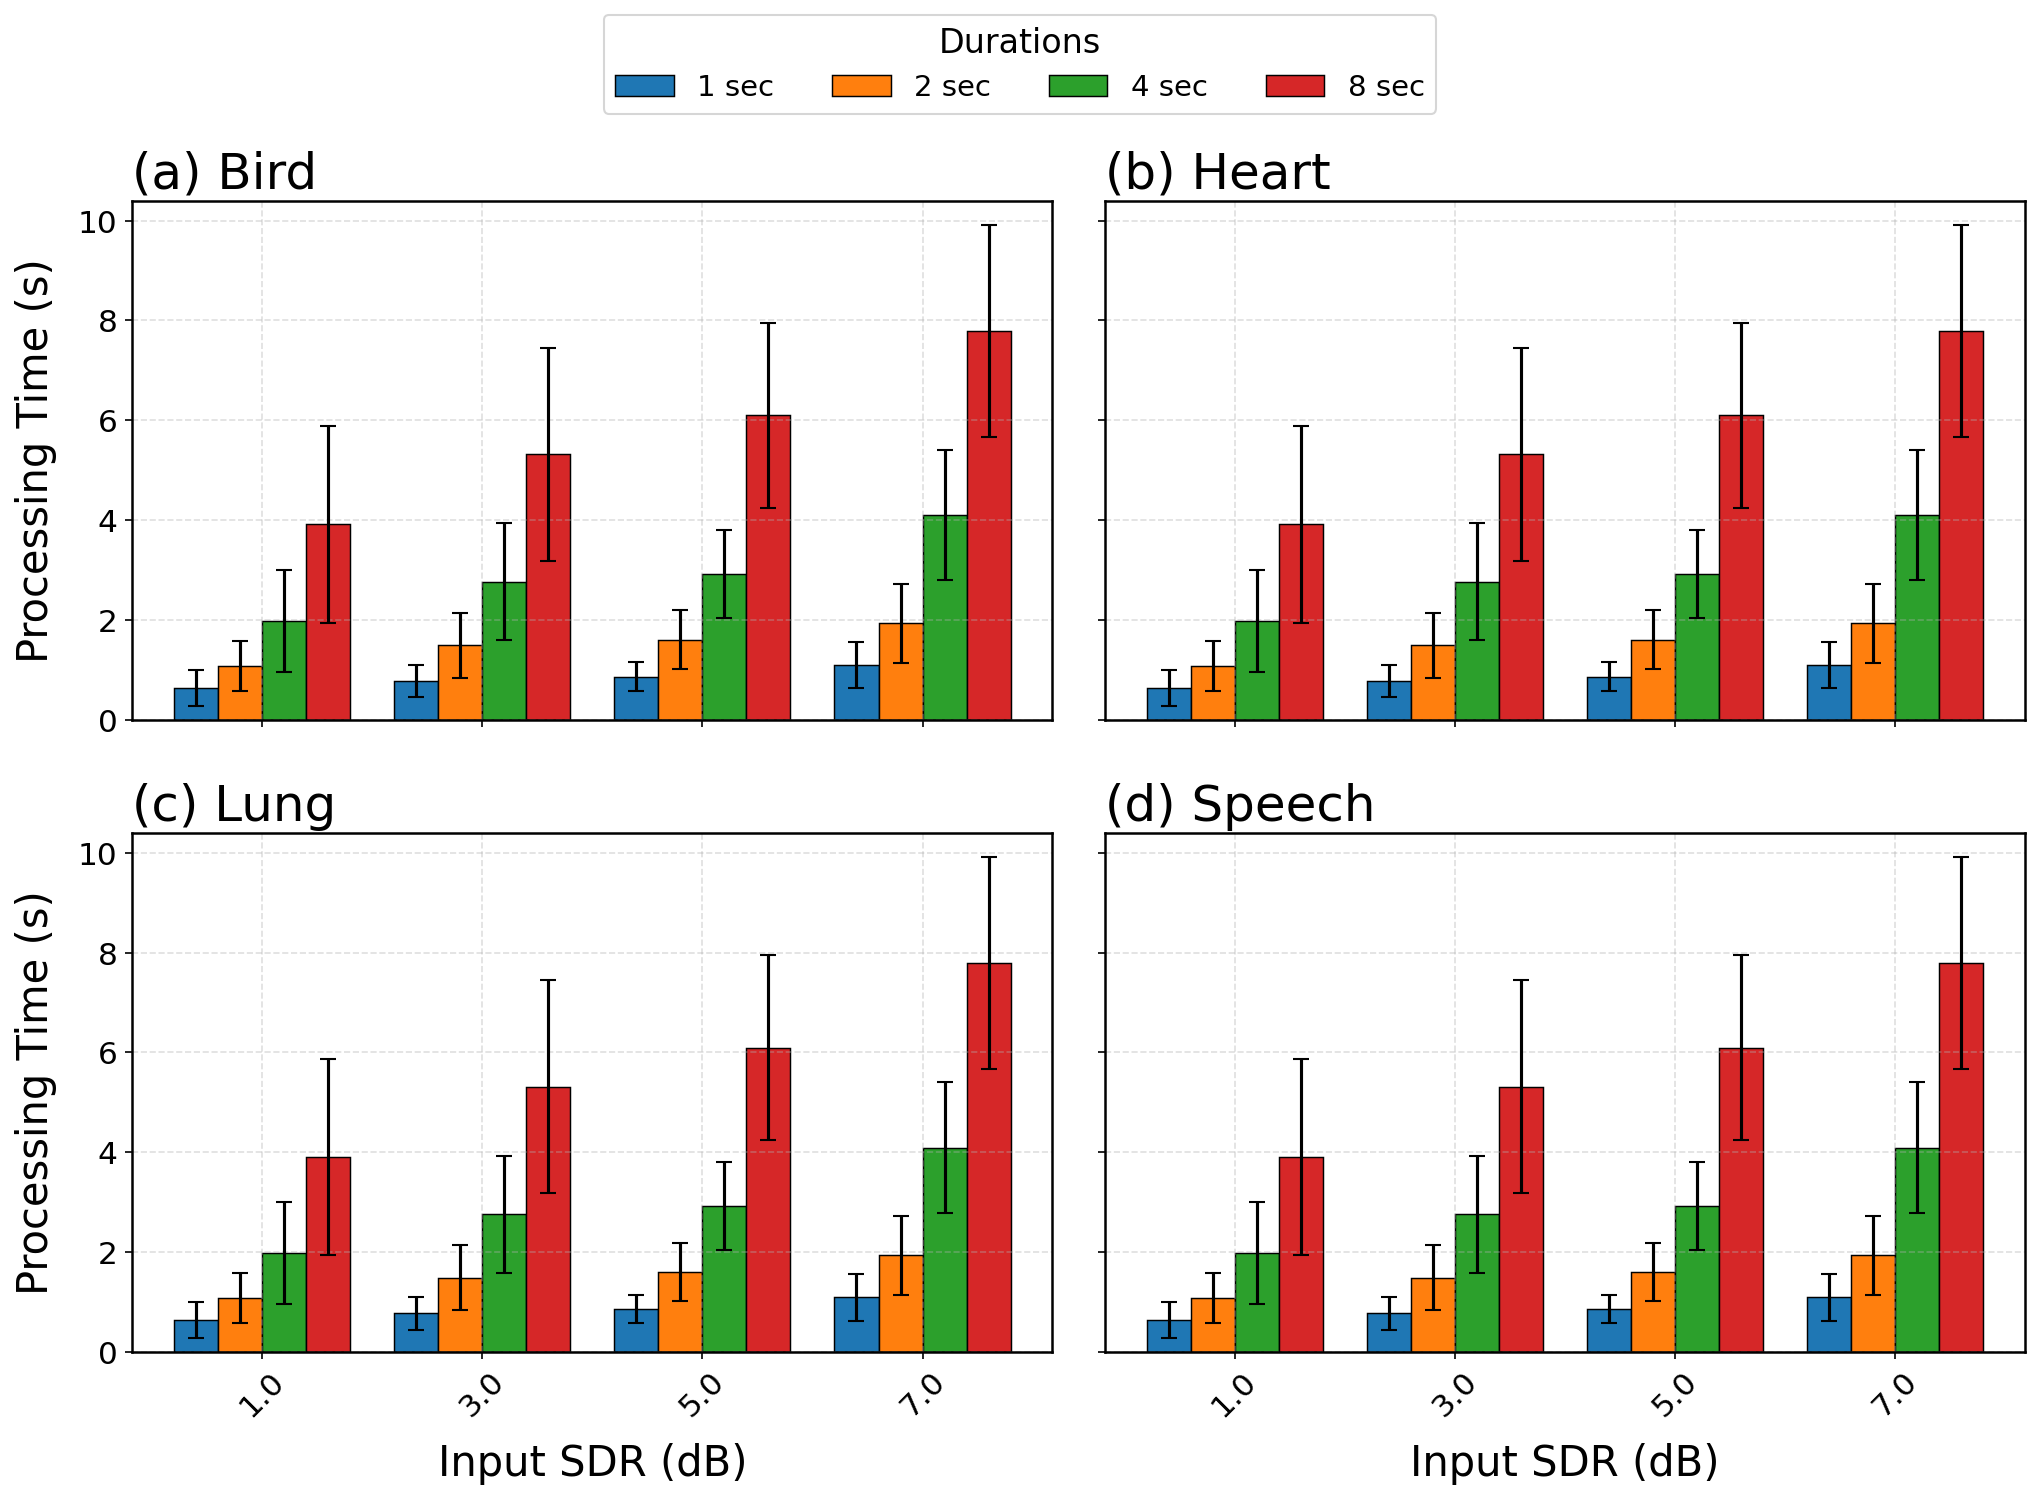

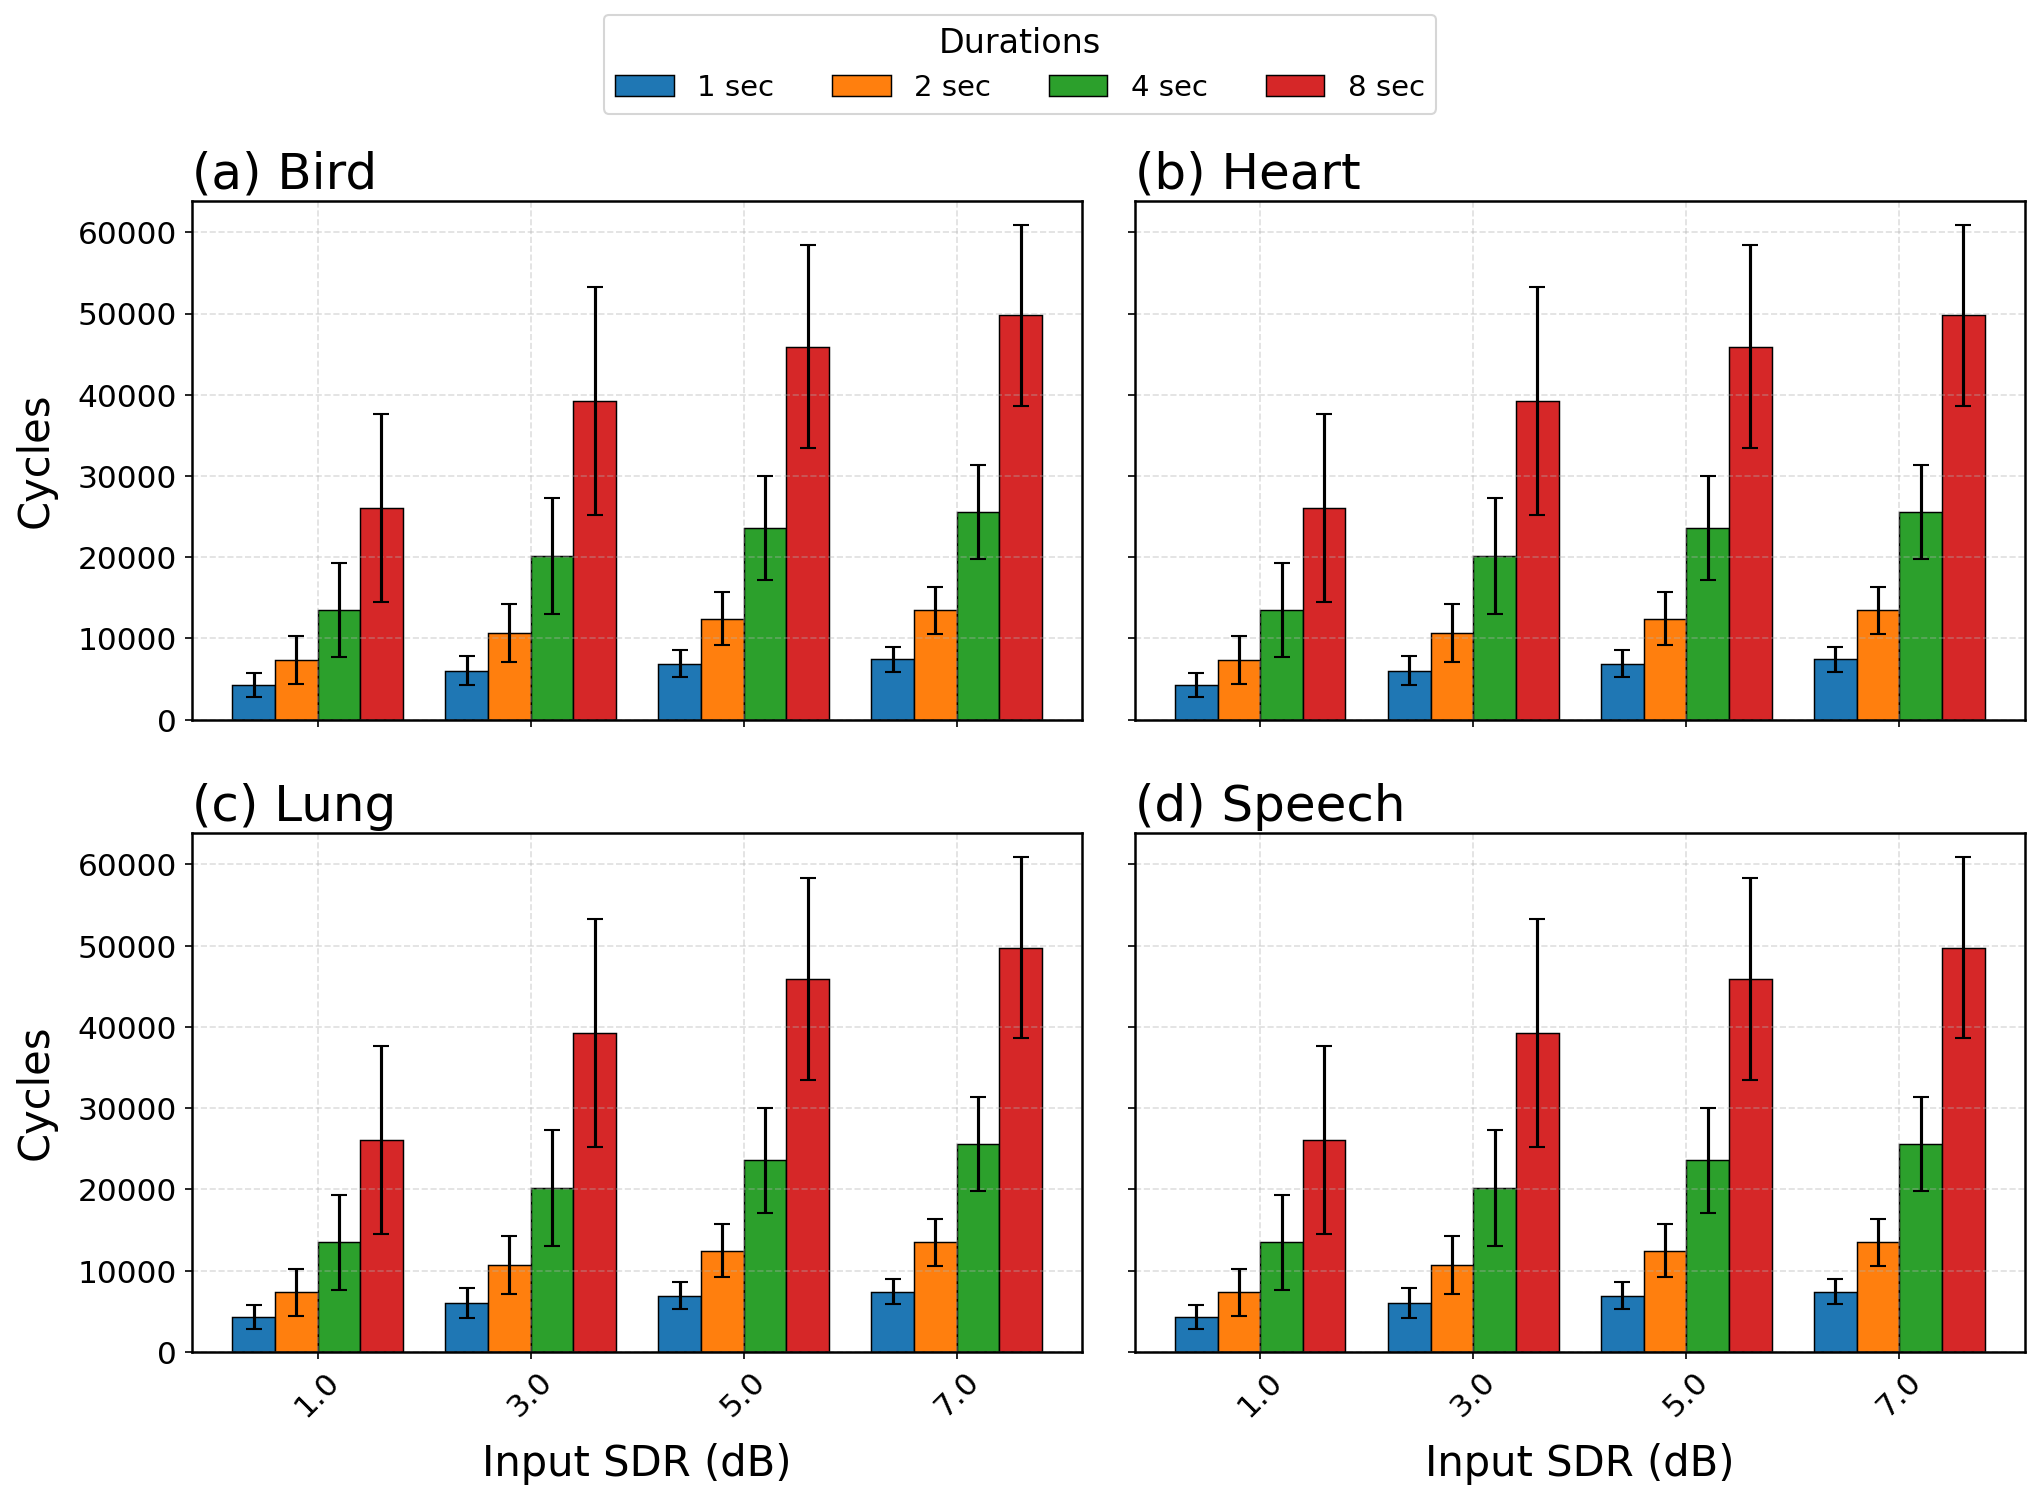

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load all datasets into a dictionary for iteration
file_paths = {
    'Bird': '/data2/AAG/Audio_Declip/exp1/heart_sound/evaluation_results_baseline_model_SDR_.xlsx',
    'Heart': '/data2/AAG/Audio_Declip/exp1/heart_sound/evaluation_results_baseline_model_SDR_.xlsx',
    'Lung': '/data2/AAG/Audio_Declip/exp1/heart_sound/evaluation_results_baseline_model_SDR_.xlsx',
    'Speech': '/data2/AAG/Audio_Declip/exp1/heart_sound/evaluation_results_baseline_model_SDR_.xlsx'
}

datasets = {name: pd.read_excel(path) for name, path in file_paths.items()}

# Plot styling
durations = [1, 2, 4, 8]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
plt.rcParams.update({
    'font.size': 20,
    'axes.labelsize': 20,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15,
    'legend.fontsize': 30,
    'figure.dpi': 150,
    'axes.linewidth': 1.2,
    'axes.labelpad':10
})

def plot_metric_grid(metric, ylabel, fig_title):
    fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True)
    axes = axes.flatten()
    letters = ['(a)', '(b)', '(c)', '(d)']

    for ax, (label, df), letter in zip(axes, datasets.items(), letters):
        df['duration'] = df['duration'].astype(float)
        df['sdr_orig'] = df['sdr_orig'].astype(float)
        df['sdr_orig_rounded'] = df['sdr_orig'].round(1)

        unique_sdrs = sorted(df['sdr_orig_rounded'].unique())
        grouped = df.groupby(['sdr_orig_rounded', 'duration'])[metric].agg(['mean', 'std']).unstack()

        x = np.arange(len(unique_sdrs))
        width = 0.2

        for i, dur in enumerate(durations):
            means = grouped['mean'][dur].reindex(unique_sdrs).values
            stds = grouped['std'][dur].reindex(unique_sdrs).values
            ax.bar(
                x + i * width,
                means,
                width,
                yerr=stds,
                label=f'{dur} sec',
                color=colors[i],
                capsize=4,
                edgecolor='black',
                linewidth=0.7
            )

        ax.set_xticks(x + 1.5 * width)
        ax.set_xticklabels(unique_sdrs, rotation=45)
        ax.set_title(f"{letter} {label}", loc='left')
        ax.grid(True, linestyle='--', alpha=0.4)

    # Axis labels based on position
    axes[0].set_ylabel(ylabel)
    axes[2].set_ylabel(ylabel)
    axes[2].set_xlabel("Input SDR (dB)")
    axes[3].set_xlabel("Input SDR (dB)")

    # Common legend
    handles, labels_ = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels_, loc='upper center', bbox_to_anchor=(0.5, 1.02), ncol=4,
               fontsize=14, title="Durations", title_fontsize=16)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Plot 1: delta_sdr
plot_metric_grid('delta_sdr', 'ΔSDR (dB)', 'ΔSDR vs Input SDR (Mean ± Std)')

# Plot 2: processing_time
plot_metric_grid('processing_time', 'Processing Time (s)', 'Processing Time vs Input SDR (Mean ± Std)')

# Plot 3: cycles
plot_metric_grid('cycles', 'Cycles', 'Cycles vs Input SDR (Mean ± Std)')


# Experiment 2 

In [ ]:
# nohup python evaluate.py --test_audio_dir "/data2/AAG/Audio_Declip/midterm_sounds/Bird_sounds" --output_dir "exp2/bird_sound" --target_fs_values 5512 11025 22050 44100 --input_sdrs 1 3 5 7 --time_clip 1 --sdr_mode 1 --pesq_mode 0 > logs/bird_resample.log 2>&1 &

# nohup python evaluate.py --test_audio_dir "/data2/AAG/Audio_Declip/midterm_sounds/Heart_sounds" --output_dir "exp2/heart_sound" --target_fs_values 250 500 1000 2000 --input_sdrs 1 3 5 7 --time_clip 1 --sdr_mode 1 --pesq_mode 0 --c_win 500 > logs/heart_resample.log 2>&1 &

# nohup python evaluate.py --test_audio_dir "/data2/AAG/Audio_Declip/midterm_sounds/Lung_sounds" --output_dir "exp2/lung_sound" --target_fs_values 5512 11025 22050 44100 --input_sdrs 1 3 5 7 --time_clip 1 --sdr_mode 1 --pesq_mode 0 > logs/lung_resample.log 2>&1 &

# nohup python evaluate.py --test_audio_dir "/data2/AAG/Audio_Declip/midterm_sounds/Speech_sounds" --output_dir "exp2/speech_sound" --target_fs_values 2756 5512 11025 22050 --input_sdrs 1 3 5 7 --time_clip 1 --sdr_mode 1 --pesq_mode 0 > logs/speech_resample.log 2>&1 &

In [ ]:
# import os

# # Path to the folder
# folder_path = "/data2/AAG/Audio_Declip/midterm_sounds/Speech_sounds"

# # Get a list of all .wav files
# wav_files = [f for f in os.listdir(folder_path) if f.endswith('.wav')]

# # Sort the files to ensure consistent ordering
# wav_files.sort()

# # Rename each file
# for i, filename in enumerate(wav_files, start=1):
#     new_name = f"sound{i}.wav"
#     old_path = os.path.join(folder_path, filename)
#     new_path = os.path.join(folder_path, new_name)
#     os.rename(old_path, new_path)
#     print(f"Renamed '{filename}' to '{new_name}'")


Renamed '1089-134691-0006.wav' to 'sound1.wav'
Renamed '1188-133604-0039.wav' to 'sound2.wav'
Renamed '121-123859-0001.wav' to 'sound3.wav'
Renamed '121-127105-0010.wav' to 'sound4.wav'
Renamed '1221-135766-0009.wav' to 'sound5.wav'
Renamed '1284-1180-0018.wav' to 'sound6.wav'
Renamed '1284-1181-0013.wav' to 'sound7.wav'
Renamed '1320-122617-0005.wav' to 'sound8.wav'
Renamed '1320-122617-0019.wav' to 'sound9.wav'
Renamed '1320-122617-0023.wav' to 'sound10.wav'
Renamed '1320-122617-0040.wav' to 'sound11.wav'
Renamed '1580-141083-0043.wav' to 'sound12.wav'
Renamed '1580-141084-0035.wav' to 'sound13.wav'
Renamed '1580-141084-0047.wav' to 'sound14.wav'
Renamed '1995-1837-0029.wav' to 'sound15.wav'
Renamed '2094-142345-0060.wav' to 'sound16.wav'
Renamed '2300-131720-0015.wav' to 'sound17.wav'
Renamed '2300-131720-0032.wav' to 'sound18.wav'
Renamed '2300-131720-0037.wav' to 'sound19.wav'
Renamed '2300-131720-0040.wav' to 'sound20.wav'
Renamed '237-134500-0008.wav' to 'sound21.wav'
Renamed '2

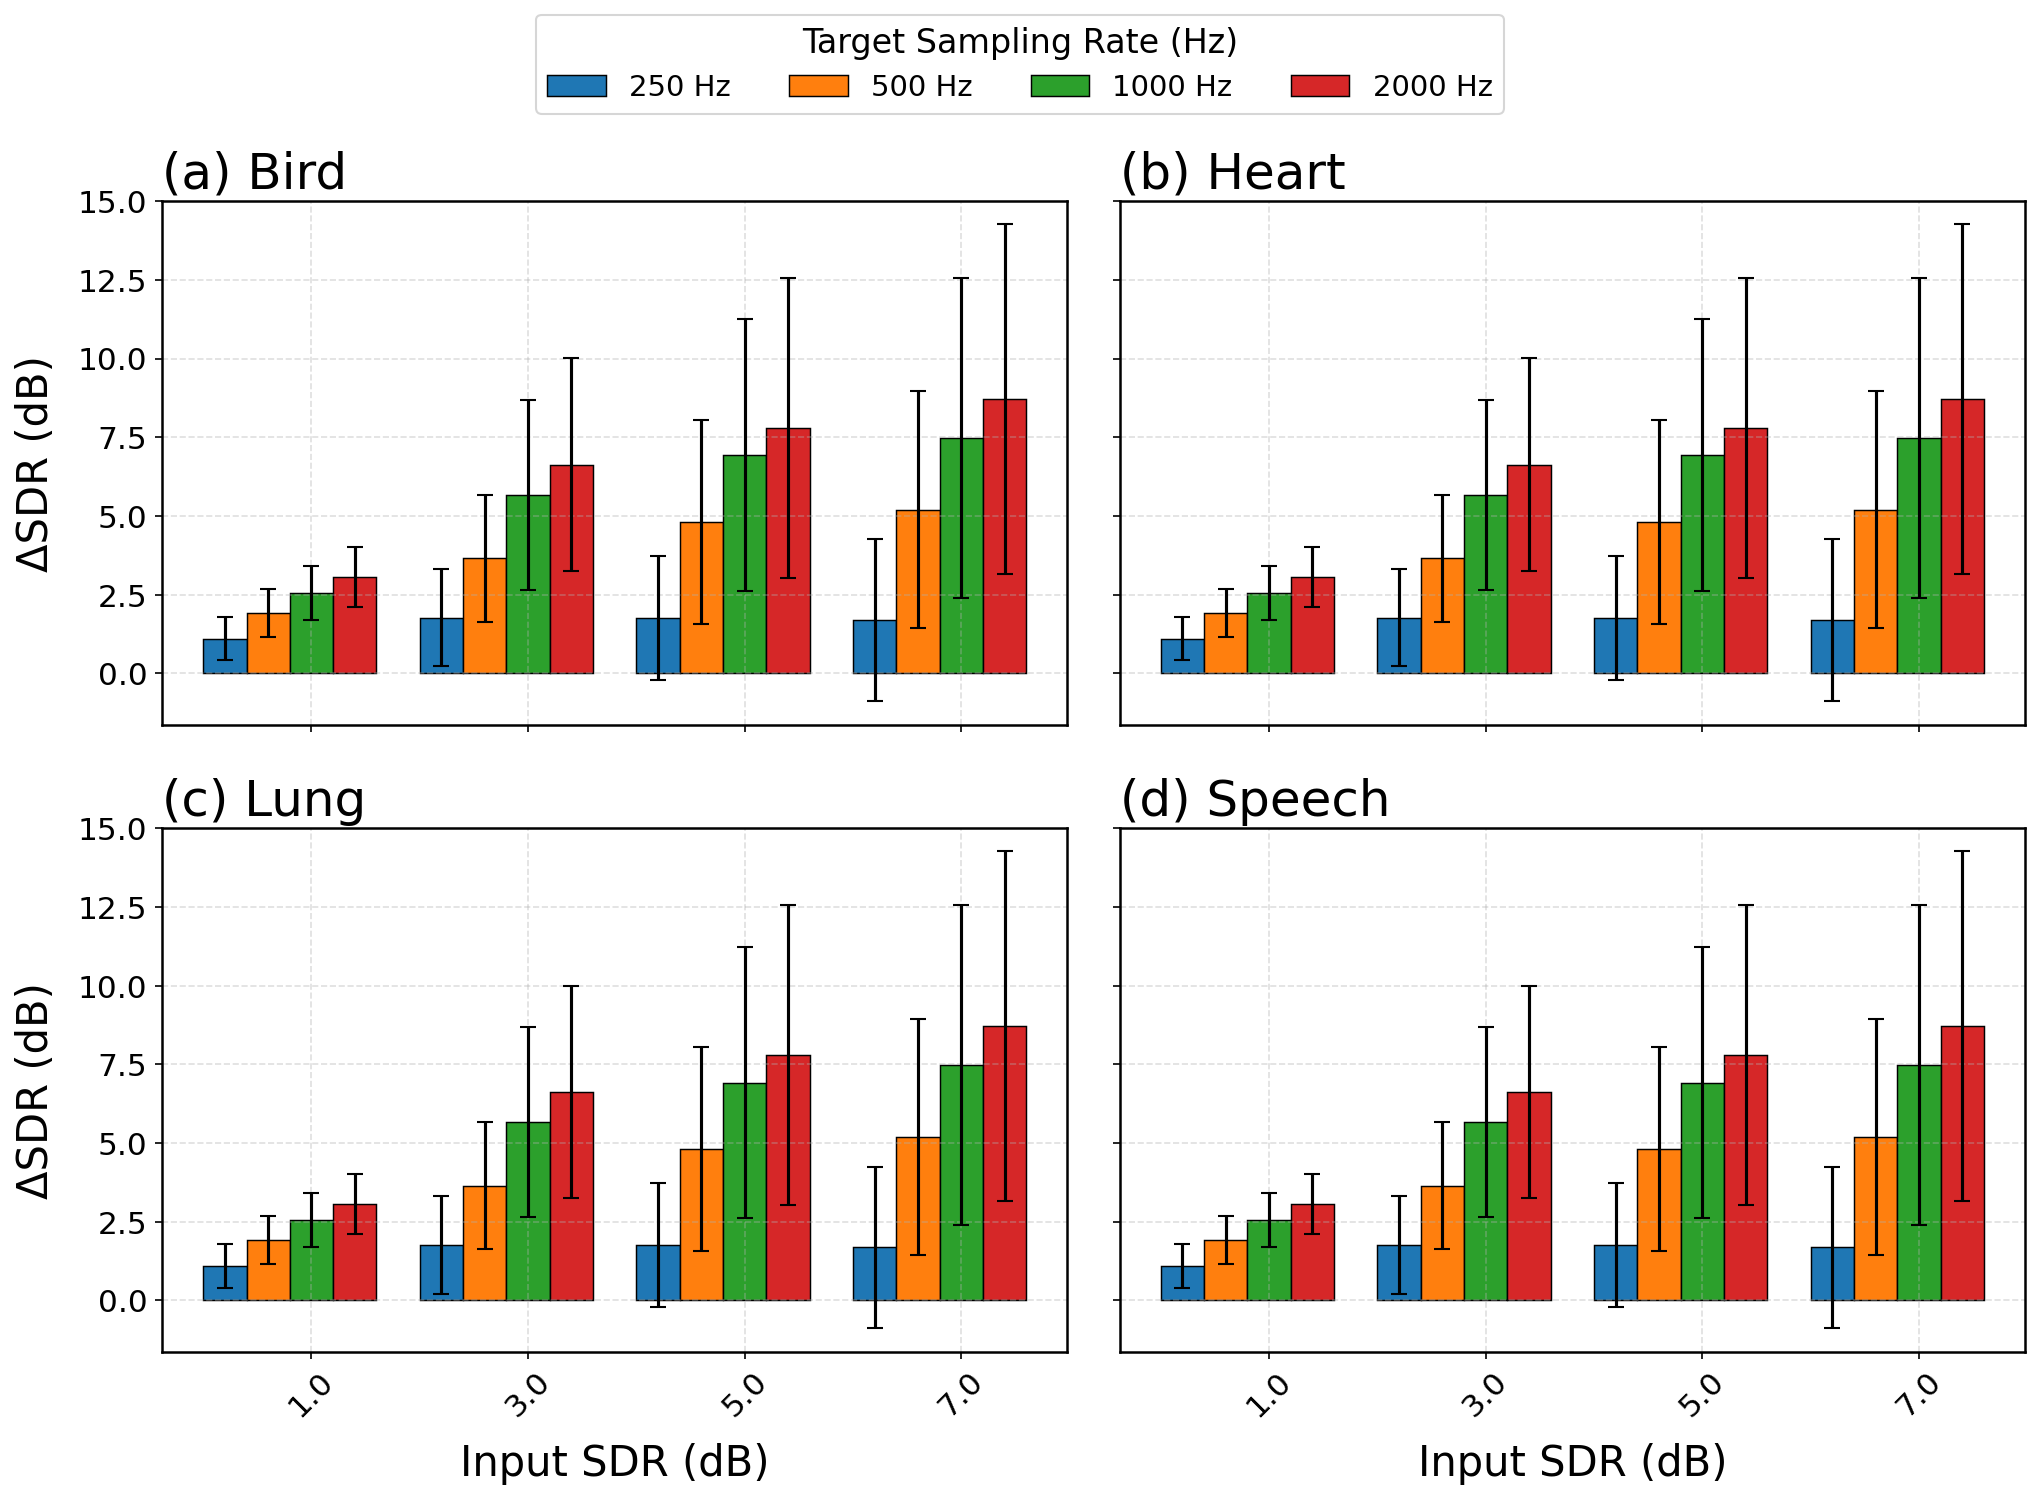

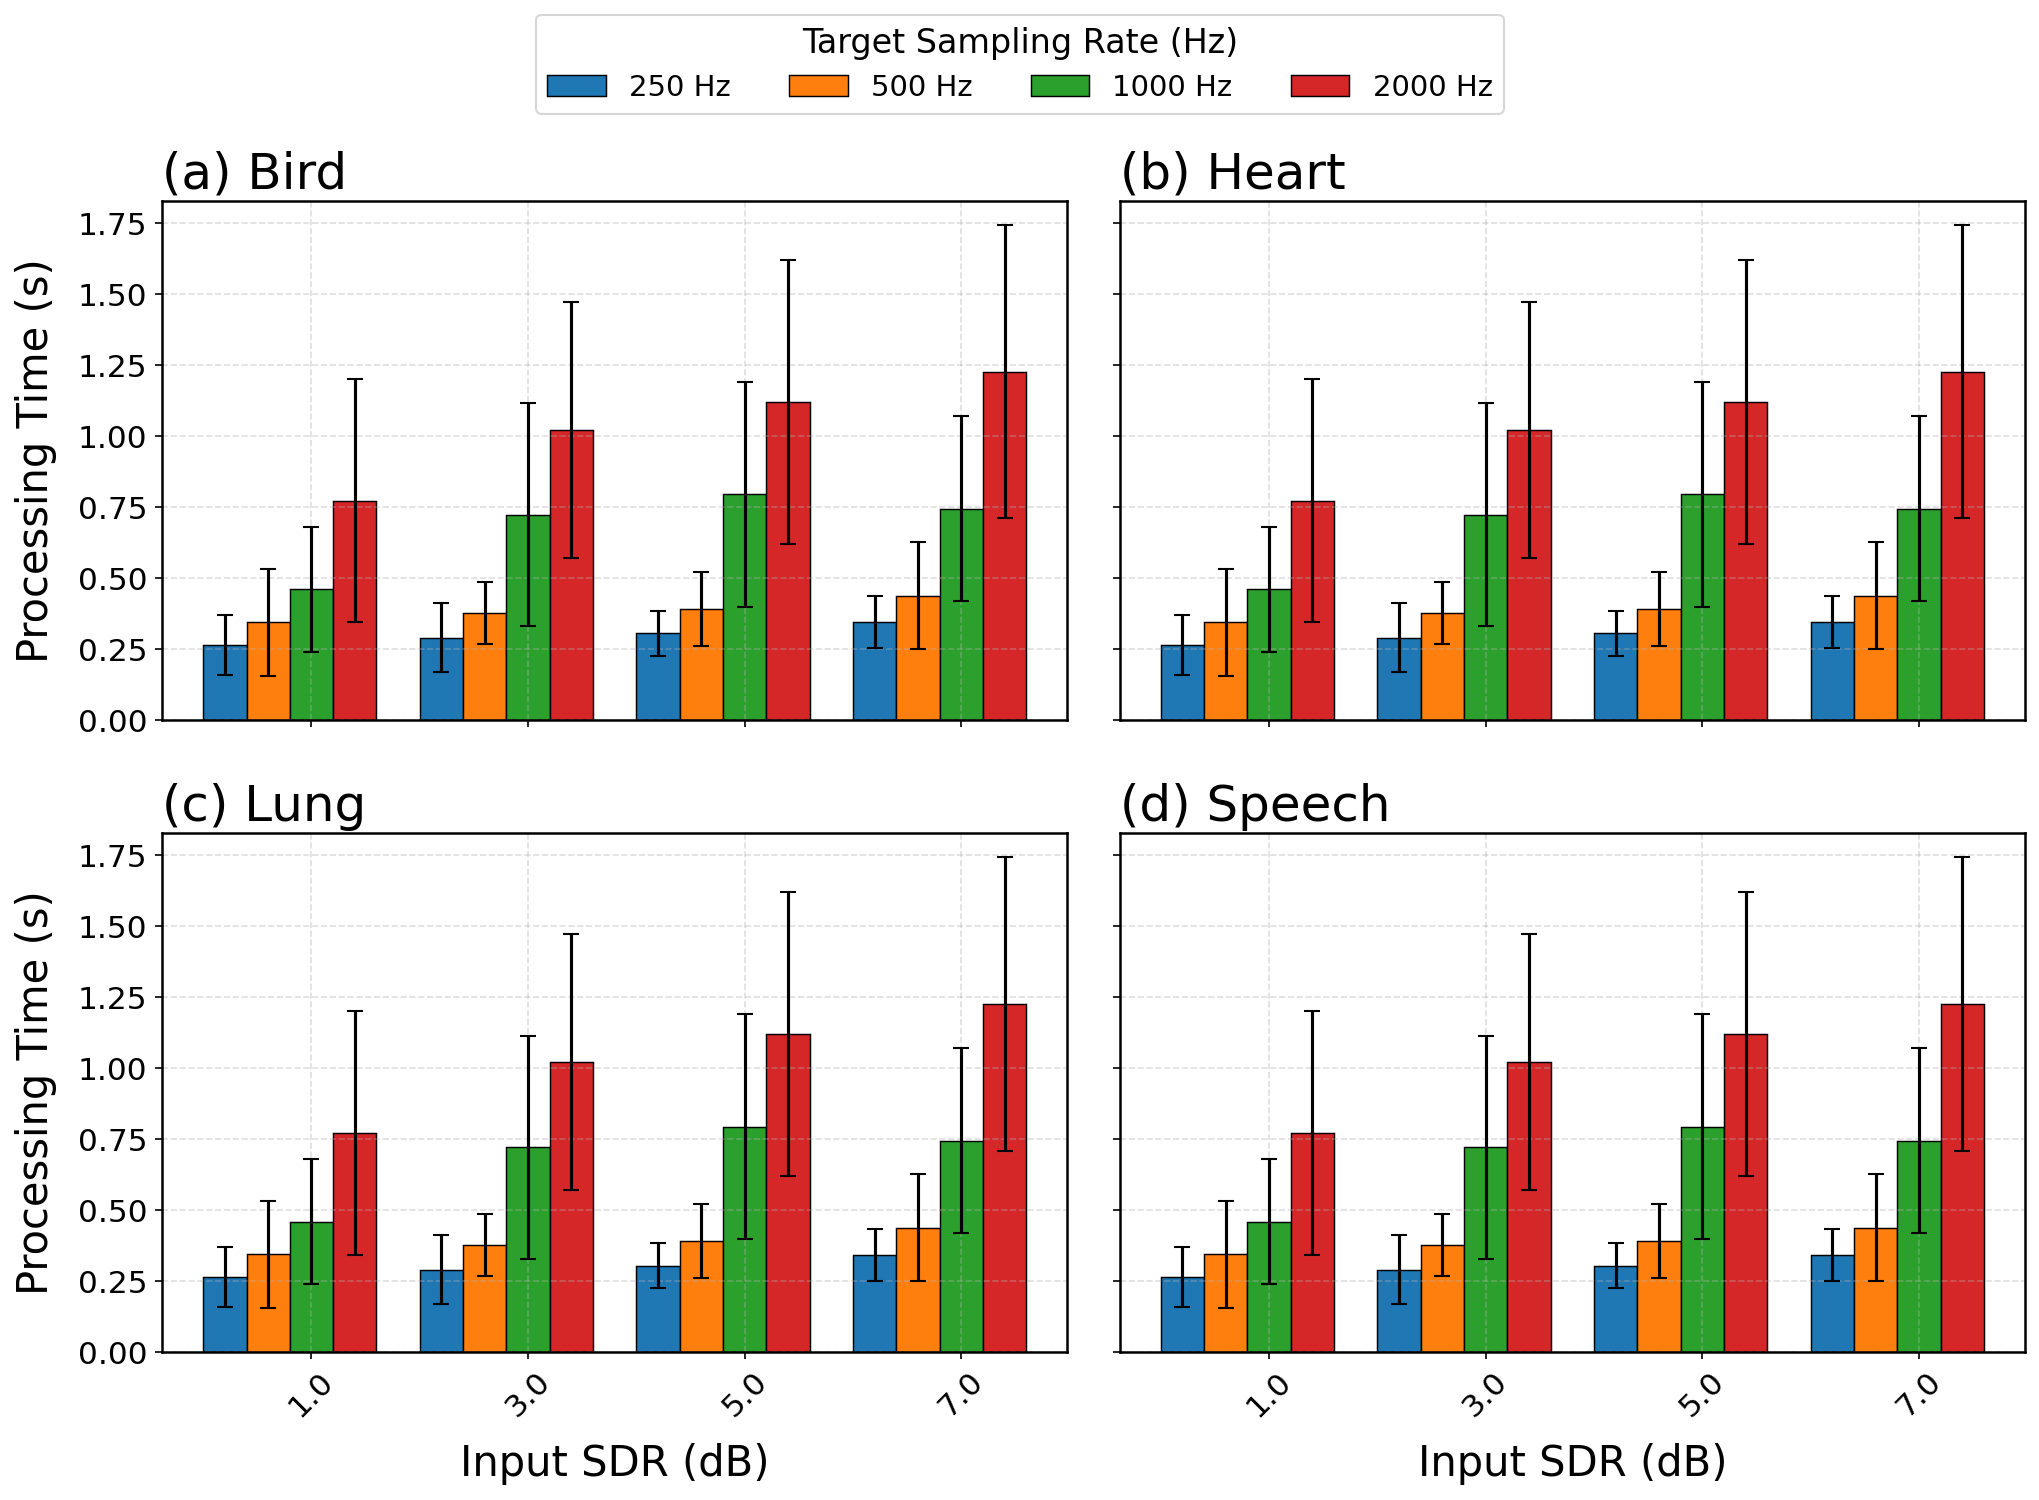

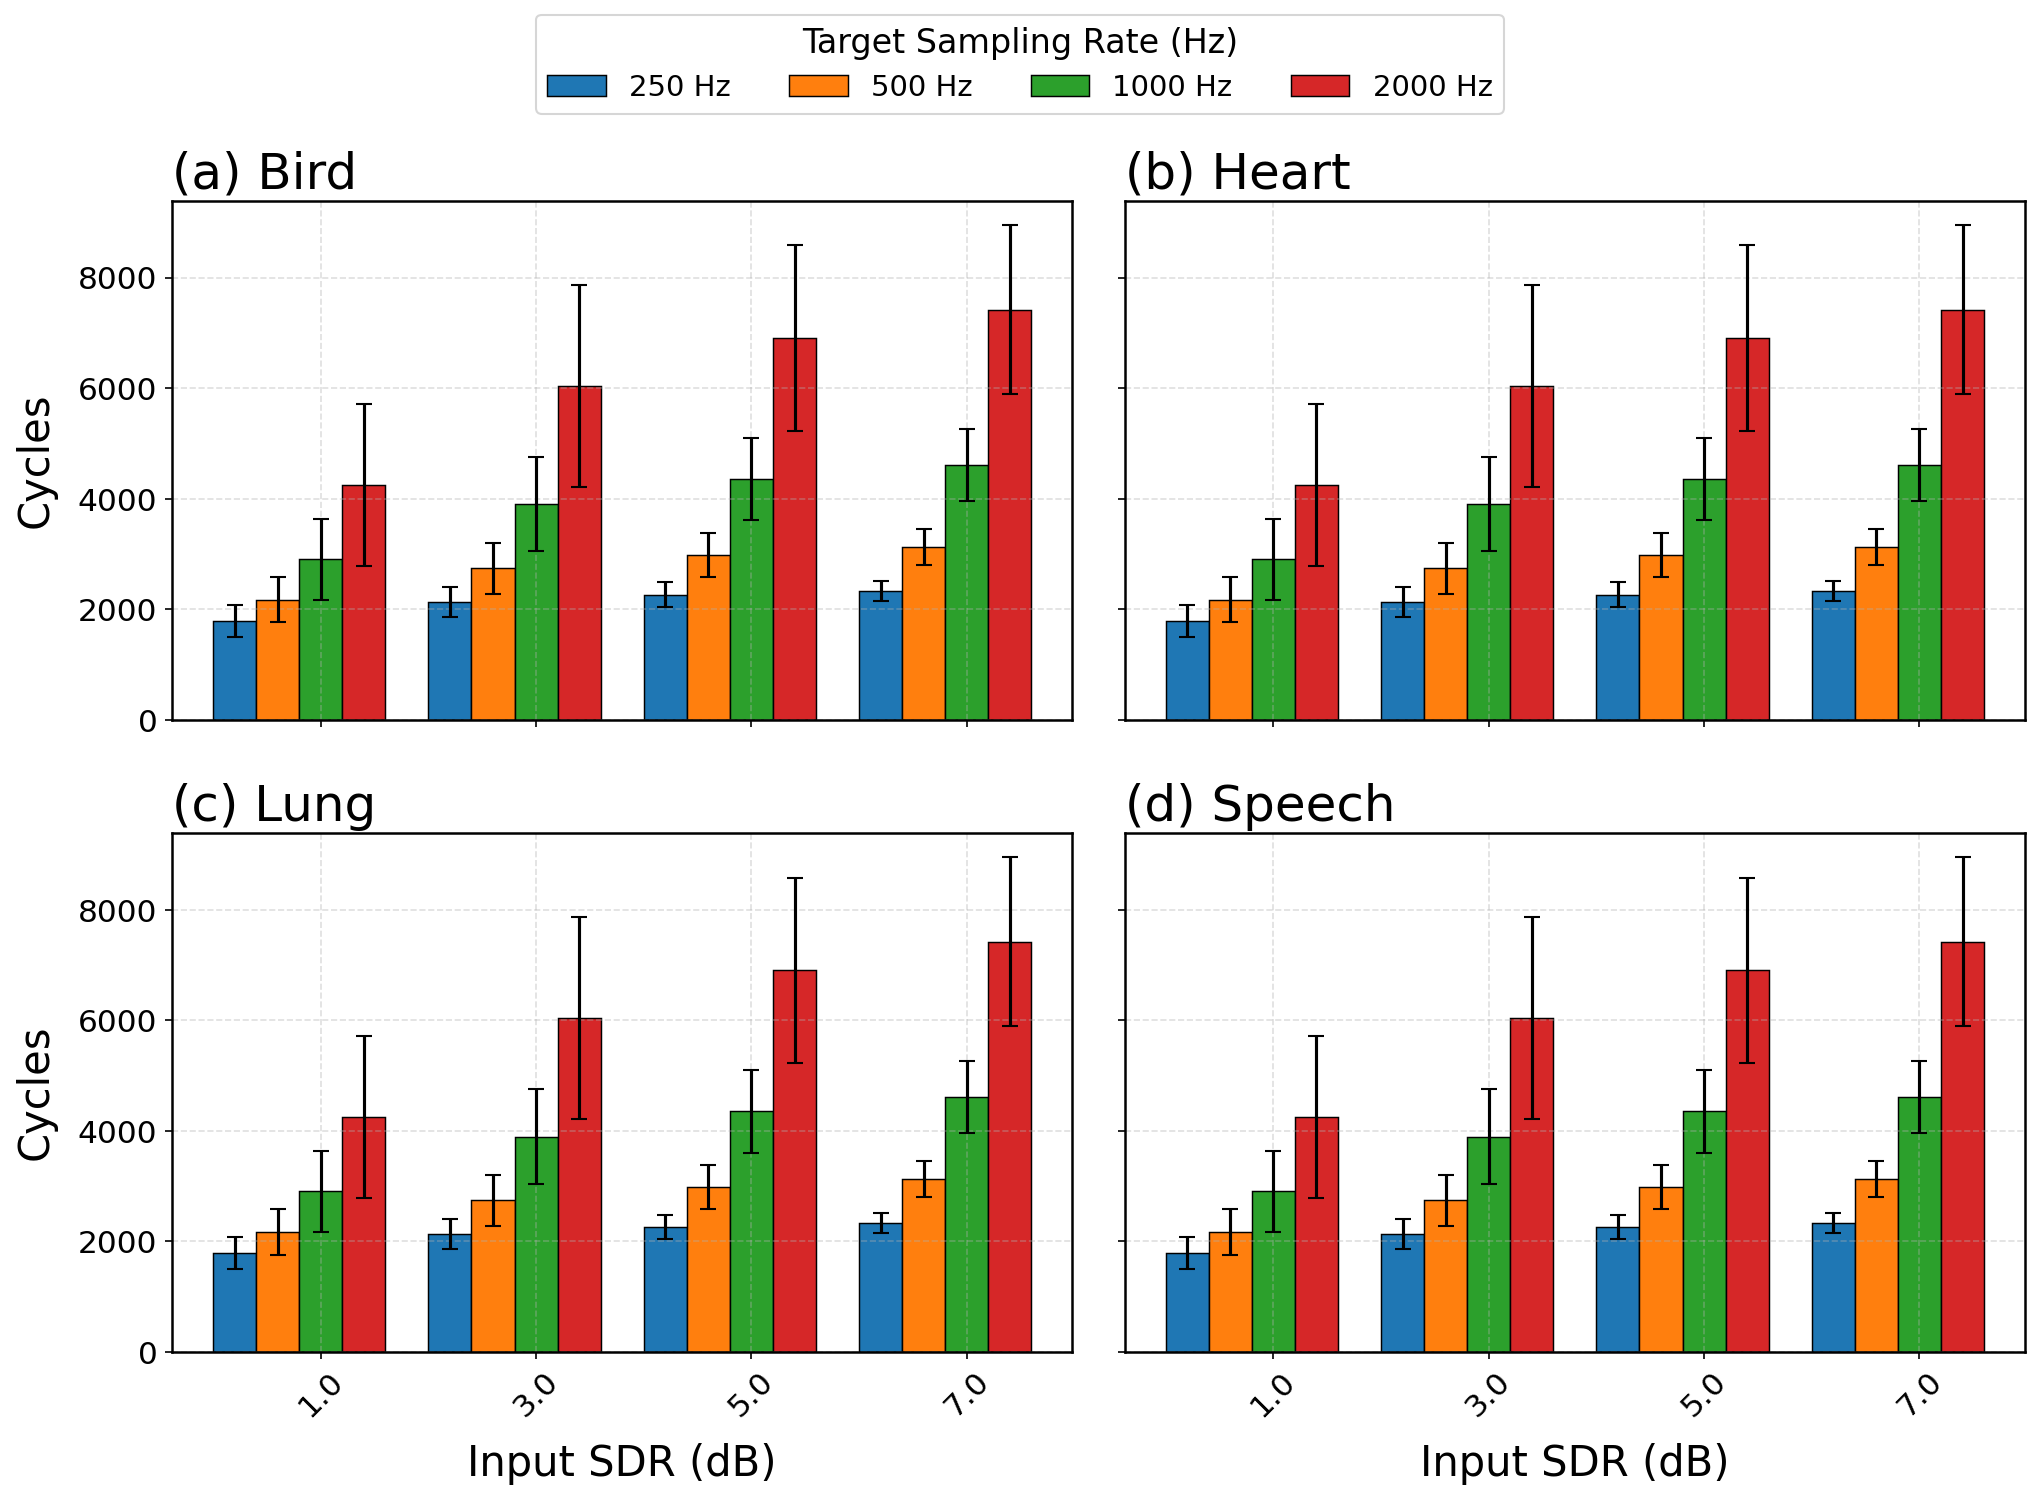

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load all datasets into a dictionary for iteration
file_paths = {
    'Bird': '/data2/AAG/Audio_Declip/exp2/heart_sound/evaluation_results_baseline_model_SDR_.xlsx',
    'Heart': '/data2/AAG/Audio_Declip/exp2/heart_sound/evaluation_results_baseline_model_SDR_.xlsx',
    'Lung': '/data2/AAG/Audio_Declip/exp2/heart_sound/evaluation_results_baseline_model_SDR_.xlsx',
    'Speech': '/data2/AAG/Audio_Declip/exp2/heart_sound/evaluation_results_baseline_model_SDR_.xlsx'
}


# Load datasets
datasets = {}
for label, path in file_paths.items():
    df = pd.read_excel(path)
    df['sdr_orig'] = df['sdr_orig'].astype(float)
    df['sdr_orig_rounded'] = df['sdr_orig'].round(1)
    df['fs'] = df['fs'].astype(str)
    datasets[label] = df

# Plot settings
metrics = {
    'delta_sdr': 'ΔSDR (dB)',
    'processing_time': 'Processing Time (s)',
    'cycles': 'Cycles'
}

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
fs_order = ['250', '500', '1000', '2000']  # Desired sampling rate order

plt.rcParams.update({
    'font.size': 20,
    'axes.labelsize': 20,
    'xtick.labelsize': 15,
    'ytick.labelsize': 15,
    'legend.fontsize': 30,
    'figure.dpi': 150,
    'axes.linewidth': 1.2,
    'axes.labelpad': 10
})

def plot_metric_grid(metric, ylabel):
    fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True)
    axes = axes.flatten()
    letters = ['(a)', '(b)', '(c)', '(d)']

    for ax, (label, df), letter in zip(axes, datasets.items(), letters):
        df['duration'] = df['duration'].astype(float)
        df['sdr_orig'] = df['sdr_orig'].astype(float)
        df['target_fs'] = df['target_fs'].astype(int)
        df['sdr_orig_rounded'] = df['sdr_orig'].round(1)

        unique_sdrs = sorted(df['sdr_orig_rounded'].unique())
        fs_values = sorted(df['target_fs'].unique())
        num_fs = len(fs_values)
        grouped = df.groupby(['sdr_orig_rounded', 'target_fs'])[metric].agg(['mean', 'std']).unstack()

        x = np.arange(len(unique_sdrs))
        width = 0.8 / num_fs  # Adjust total width to fit all bars

        for i, fs in enumerate(fs_values):
            means = grouped['mean'][fs].reindex(unique_sdrs).values
            stds = grouped['std'][fs].reindex(unique_sdrs).values
            ax.bar(
                x + i * width,
                means,
                width,
                yerr=stds,
                label=f'{fs} Hz',
                color=colors[i % len(colors)],
                capsize=4,
                edgecolor='black',
                linewidth=0.7
            )

        ax.set_xticks(x + (width * num_fs) / 2)
        ax.set_xticklabels(unique_sdrs, rotation=45)
        ax.set_title(f"{letter} {label}", loc='left')
        ax.grid(True, linestyle='--', alpha=0.4)

    # Axis labels based on position
    axes[0].set_ylabel(ylabel)
    axes[2].set_ylabel(ylabel)
    axes[2].set_xlabel("Input SDR (dB)")
    axes[3].set_xlabel("Input SDR (dB)")

    # Common legend
    handles, labels_ = axes[0].get_legend_handles_labels()
    fig.legend(handles, labels_, loc='upper center', bbox_to_anchor=(0.5, 1.02), ncol=num_fs,
               fontsize=14, title="Target Sampling Rate (Hz)", title_fontsize=16)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


# Generate grid plots
for metric, ylabel in metrics.items():
    plot_metric_grid(metric, ylabel)


# Experiment 3

In [ ]:
!rm -f /data2/AAG/Audio_Declip/logs/*.log

In [ ]:
!python evaluate.py \
    --test_audio_dir "/data2/AAG/Audio_Declip/custom_sound" \
    --output_dir "/data2/AAG/Audio_Declip/custom_sound_output" \
    --target_fs_values 44100 \
    --input_sdrs 1 \
    --time_clip 1 \
    --sdr_mode 1 \
    --pesq_mode 0 \
    --c_win 3263 

In [ ]:
# nohup python evaluate.py --test_audio_dir "/data2/AAG/Audio_Declip/midterm_sounds/Bird_sounds" --output_dir "exp3_new/bird_sound" --target_fs_values 11025 --input_sdrs 1 3 5 7 --time_clip 1 --sdr_mode 1 --pesq_mode 0 --c_win 110 165 254 375 573 860 1290 1940 2922 4410 --n_files 50 --exp_name timewise_len > logs/bird_blocks.log 2>&1 &

# nohup python evaluate.py --test_audio_dir "/data2/AAG/Audio_Declip/midterm_sounds/Heart_sounds" --output_dir "exp3_new/heart_sound" --target_fs_values 2000 --input_sdrs 1 3 5 7 --time_clip 1 --sdr_mode 1 --pesq_mode 0 --c_win 20 28 38 54 76 106 148 207 286 400 --n_files 50 --exp_name timewise_len > logs/heart_blocks.log 2>&1 &

# nohup python evaluate.py --test_audio_dir "/data2/AAG/Audio_Declip/midterm_sounds/Lung_sounds" --output_dir "exp3_new/lung_sound" --target_fs_values 4000 --input_sdrs 1 3 5 7 --time_clip 1 --sdr_mode 1 --pesq_mode 0 --c_win 40 60 92 136 208 312 468 704 1060 1600 --n_files 50 --exp_name timewise_len > logs/lung_blocks.log 2>&1 &

# nohup python evaluate.py --test_audio_dir "/data2/AAG/Audio_Declip/midterm_sounds/Speech_sounds" --output_dir "exp3_new/speech_sound" --target_fs_values 16000 --input_sdrs 1 3 5 7 --time_clip 1 --sdr_mode 1 --pesq_mode 0 --c_win 160 240 368 544 832 1248 1872 2816 4240 6400 --n_files 50 --exp_name timewise_len > logs/speech_blocks.log 2>&1 &


In [ ]:
from toolbox.gabwin import gabwin
def consistency_check(n):
    g = gabwin(n)
    if n == len(g):
        print("consistent")
    else:
        print("not consistent")

# Compute uniform window lengths

In [ ]:
import numpy as np
from toolbox.gabwin import gabwin

# Define your sampling rates
fs_values = [11025, 4000, 16000, 2000]

# Create non-uniform window lengths with more sampling at smaller values
# Method 1: Logarithmic spacing
win_len_ms = np.round(np.logspace(np.log10(10), np.log10(400), 10))
print(f"Original window lengths (ms): {win_len_ms}")

# Function to check and adjust window lengths for consistency
def make_consistent(n):
    """
    Check if window length n is consistent with gabwin(n) length.
    If not consistent, adjust n by ±1 until consistent.
    """
    original_n = n
    g = gabwin(n)
    
    # If already consistent, return original n
    if n == len(g):
        return n
    
    # Try increasing and decreasing by 1 until consistent
    offset = 1
    while True:
        # Try increasing by offset
        n_plus = original_n + offset
        g_plus = gabwin(n_plus)
        if n_plus == len(g_plus):
            return n_plus
            
        # Try decreasing by offset
        n_minus = original_n - offset
        if n_minus > 0:  # Ensure window length is positive
            g_minus = gabwin(n_minus)
            if n_minus == len(g_minus):
                return n_minus
                
        # Increase offset for next iteration
        offset += 1
        
        # Safety check to prevent infinite loops
        if offset > 10:
            print(f"Warning: Could not find consistent window length near {original_n}")
            return original_n

# Process each sampling rate
print("\n=== FINAL WINDOW LENGTHS ===")
for fs in fs_values:
    print(f"\nSampling rate: {fs} Hz")
    
    # Convert window lengths from milliseconds to samples
    original_win_len_samples = np.round(win_len_ms * fs / 1000).astype(int)
    
    # Check and adjust for consistency
    consistent_win_len_samples = np.array([make_consistent(n) for n in original_win_len_samples])
    
    # Convert back to milliseconds for comparison
    consistent_win_len_ms = consistent_win_len_samples * 1000 / fs

    print (consistent_win_len_samples)

Original window lengths (ms): [ 10.  15.  23.  34.  52.  78. 117. 176. 265. 400.]

=== FINAL WINDOW LENGTHS ===

Sampling rate: 11025 Hz
[ 110  165  254  375  573  860 1290 1940 2922 4410]

Sampling rate: 4000 Hz
[  40   60   92  136  208  312  468  704 1060 1600]

Sampling rate: 16000 Hz
[ 160  240  368  544  832 1248 1872 2816 4240 6400]

Sampling rate: 2000 Hz
[ 20  30  46  68 104 156 234 352 530 800]


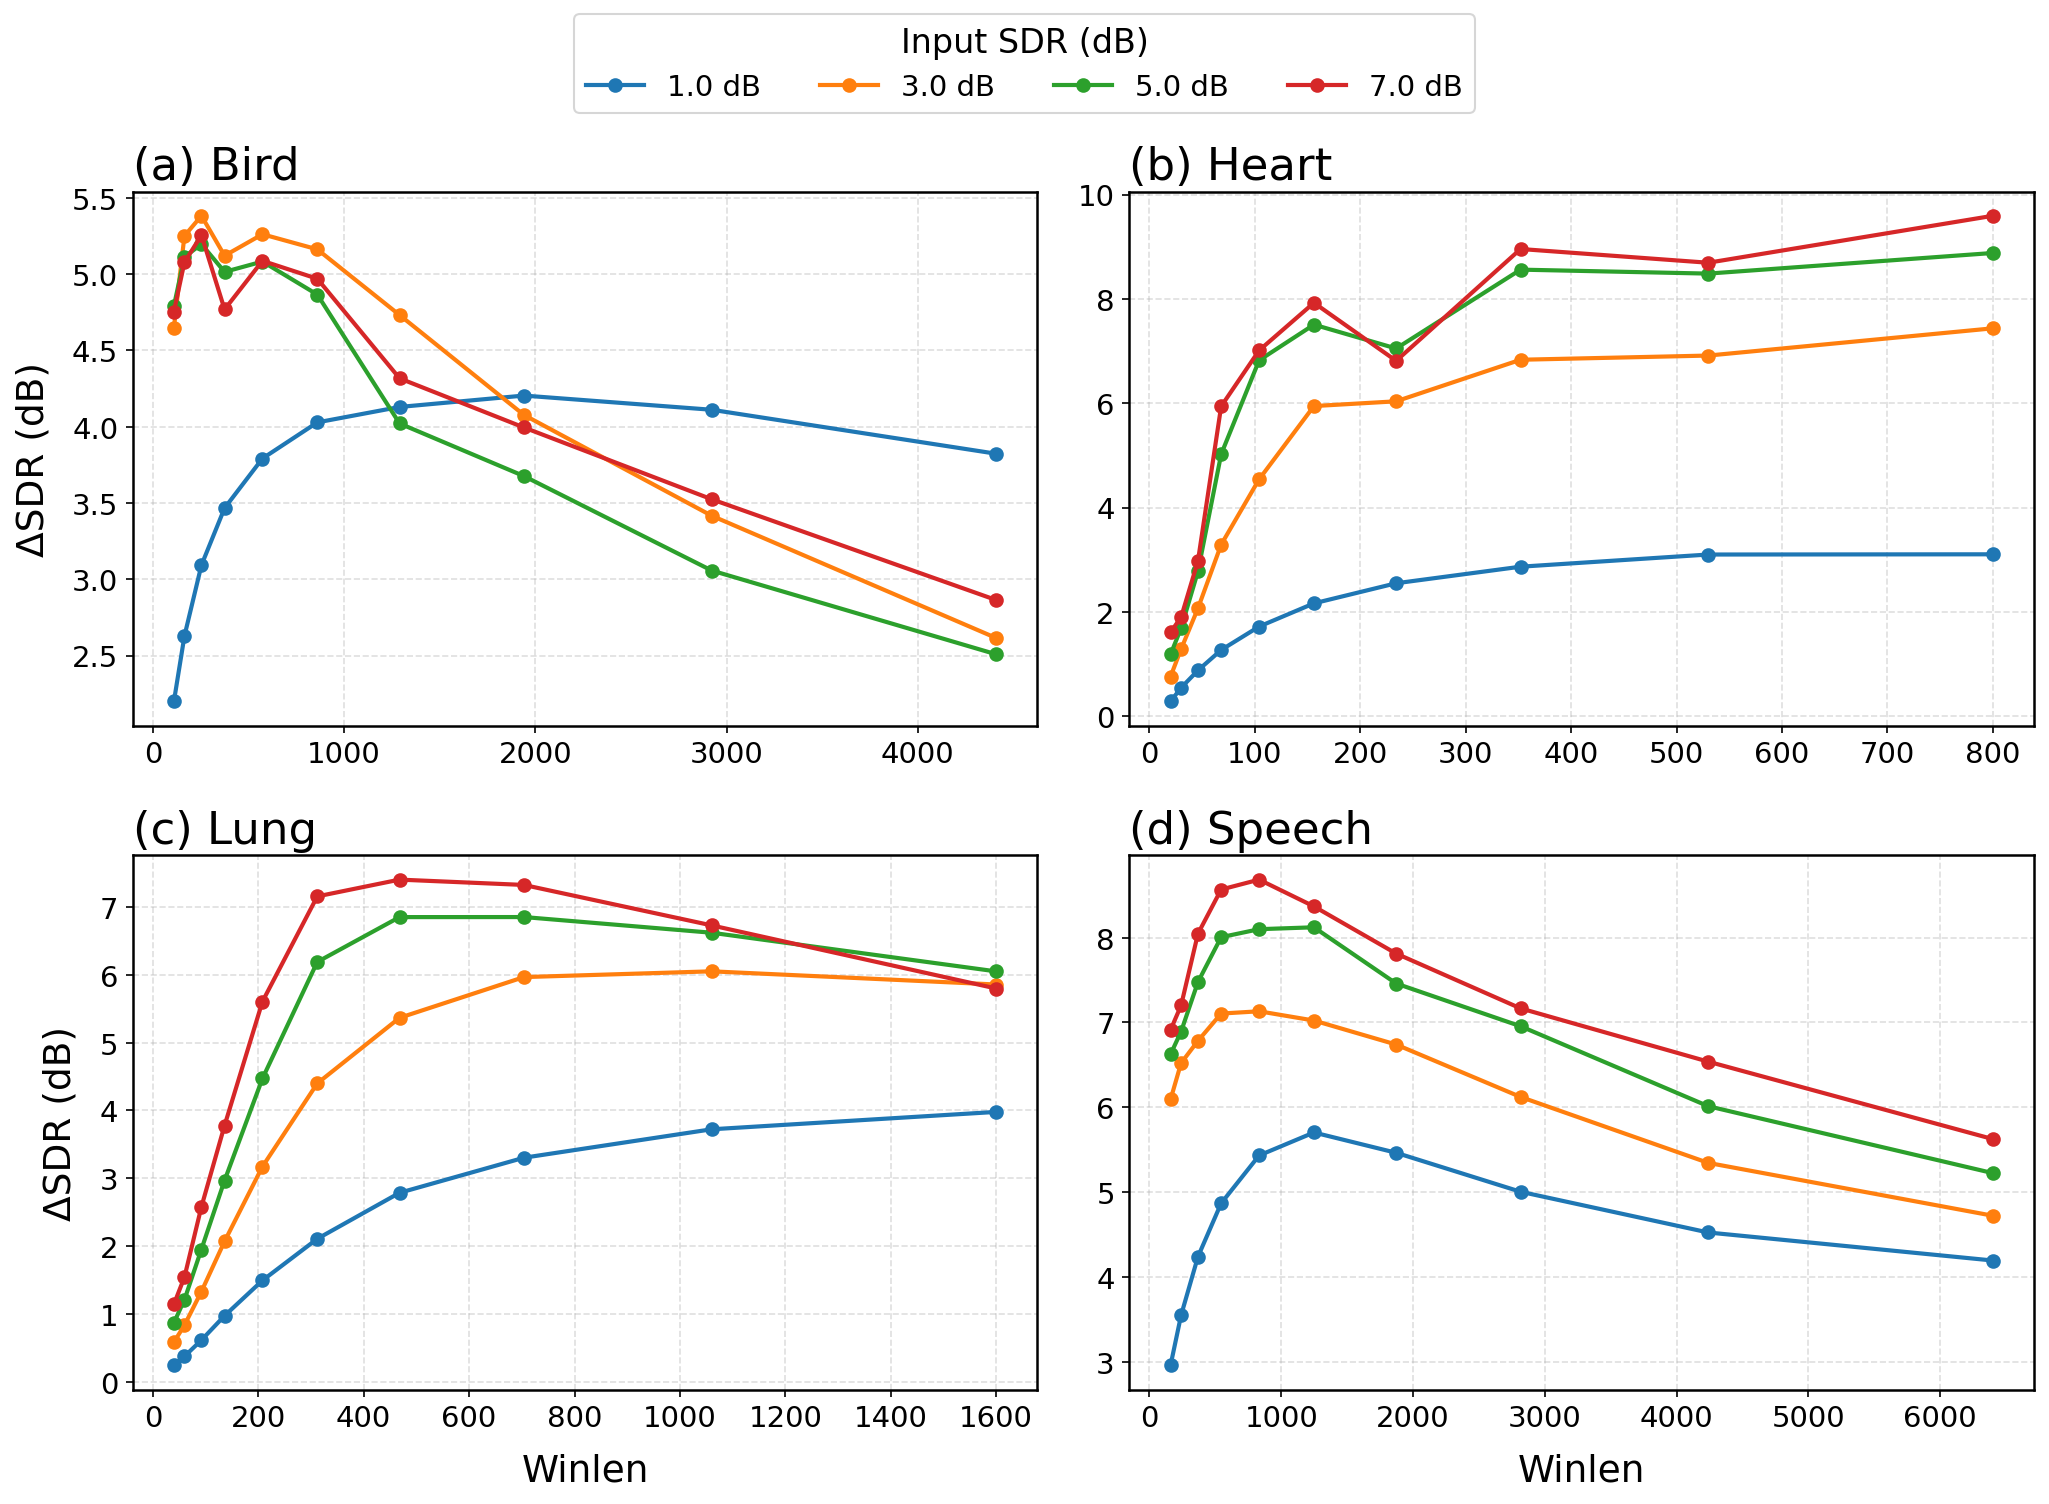

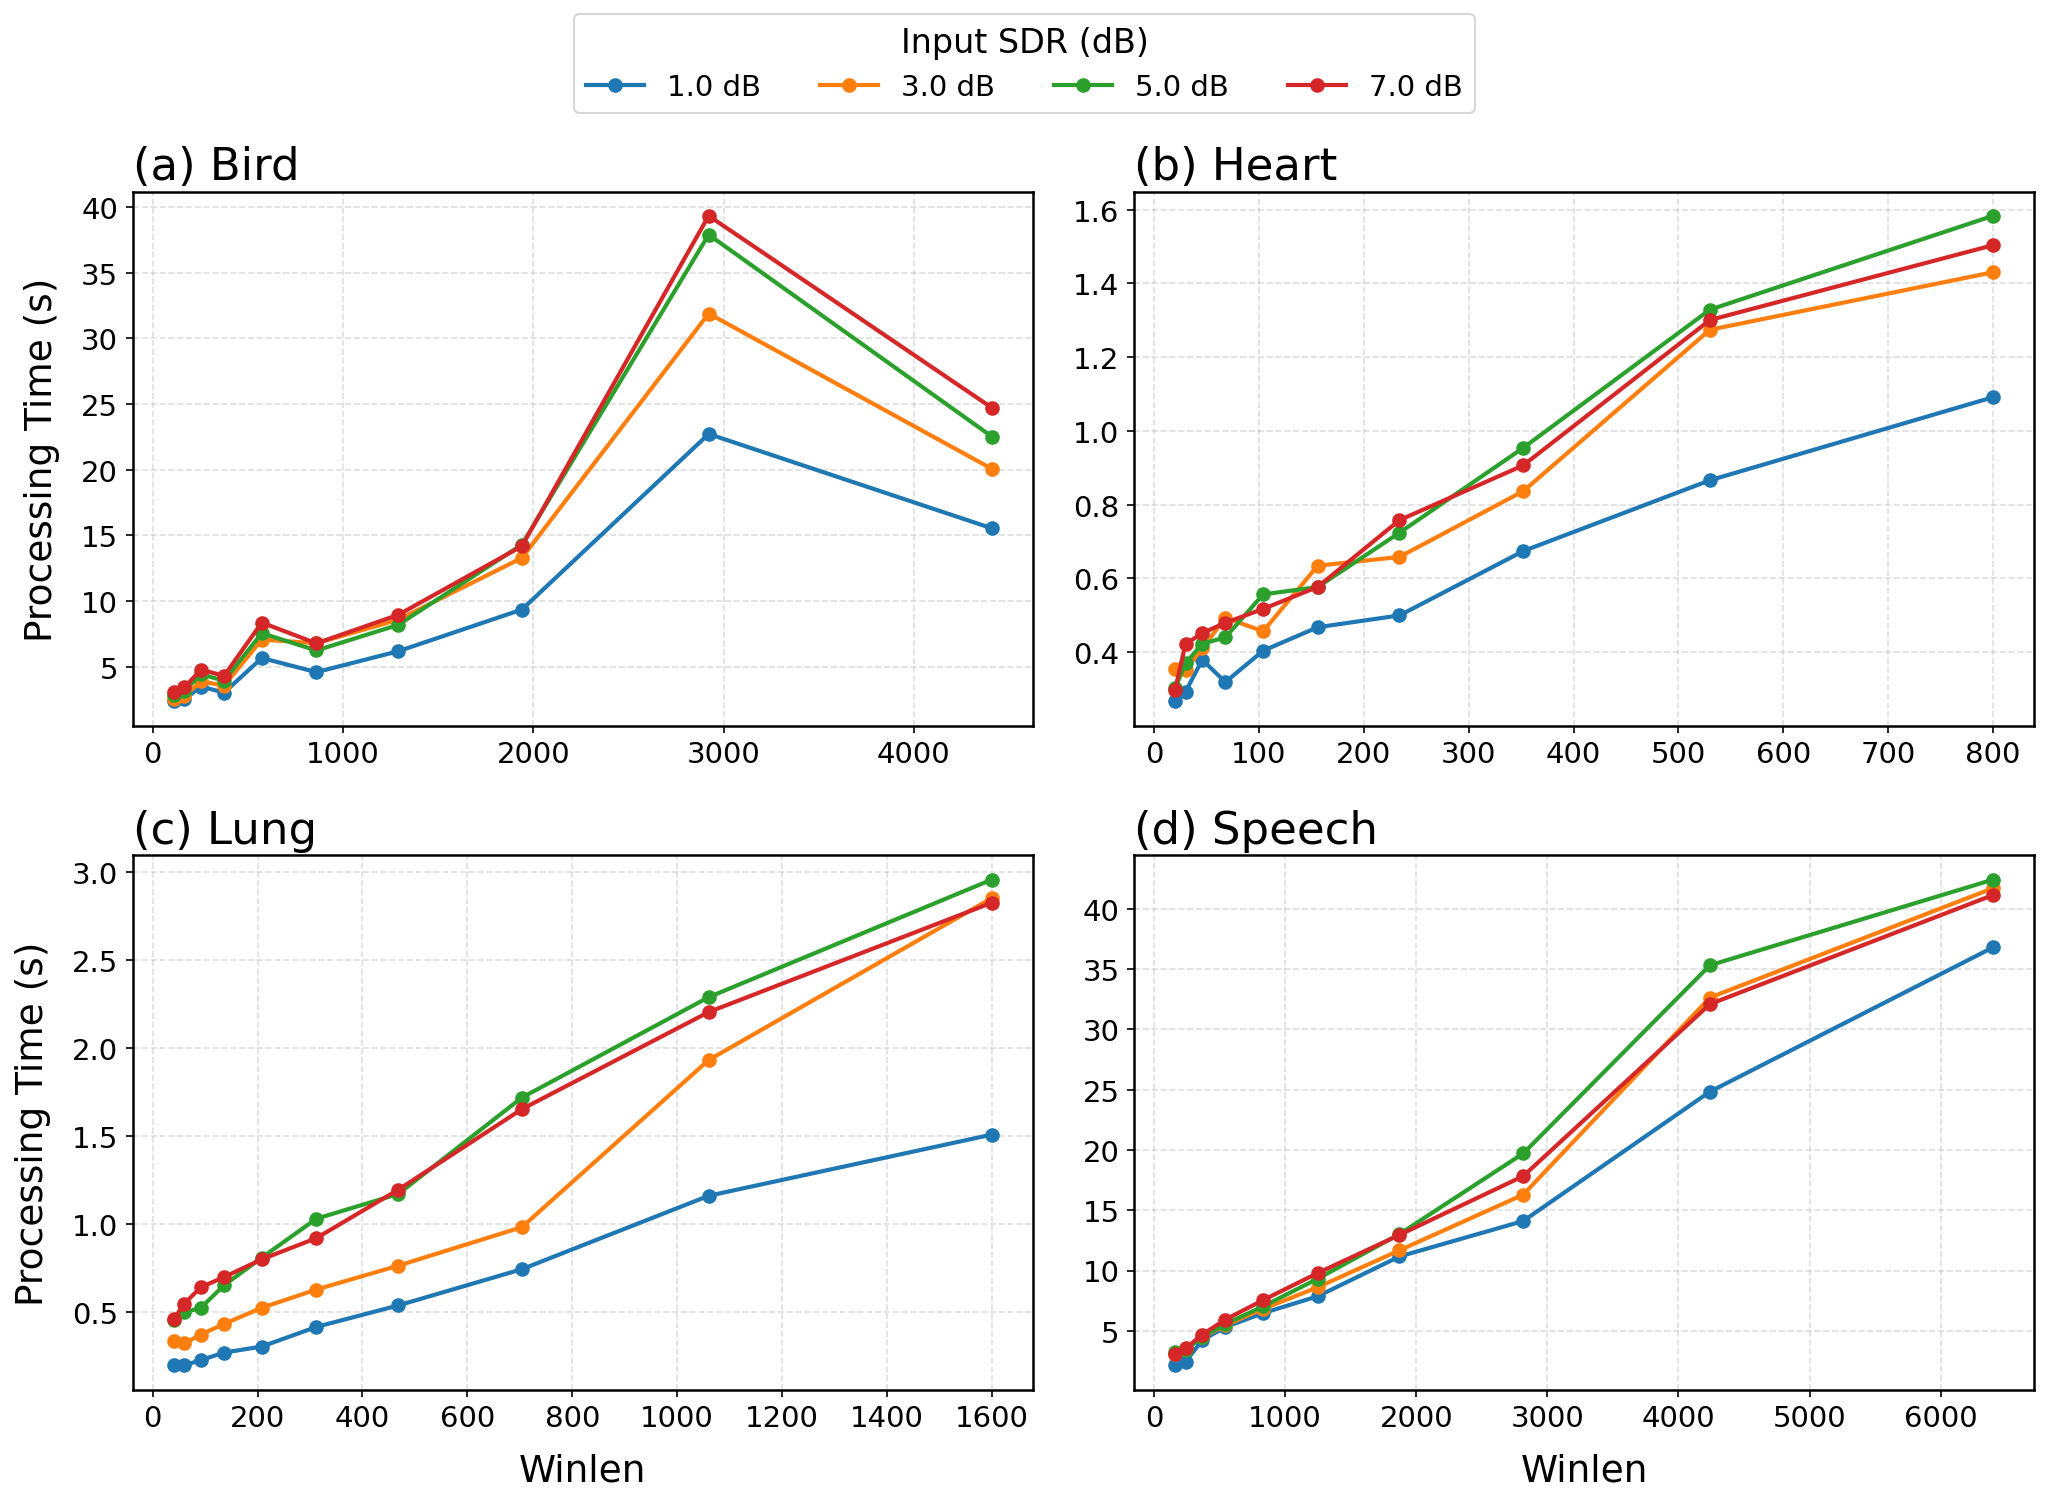

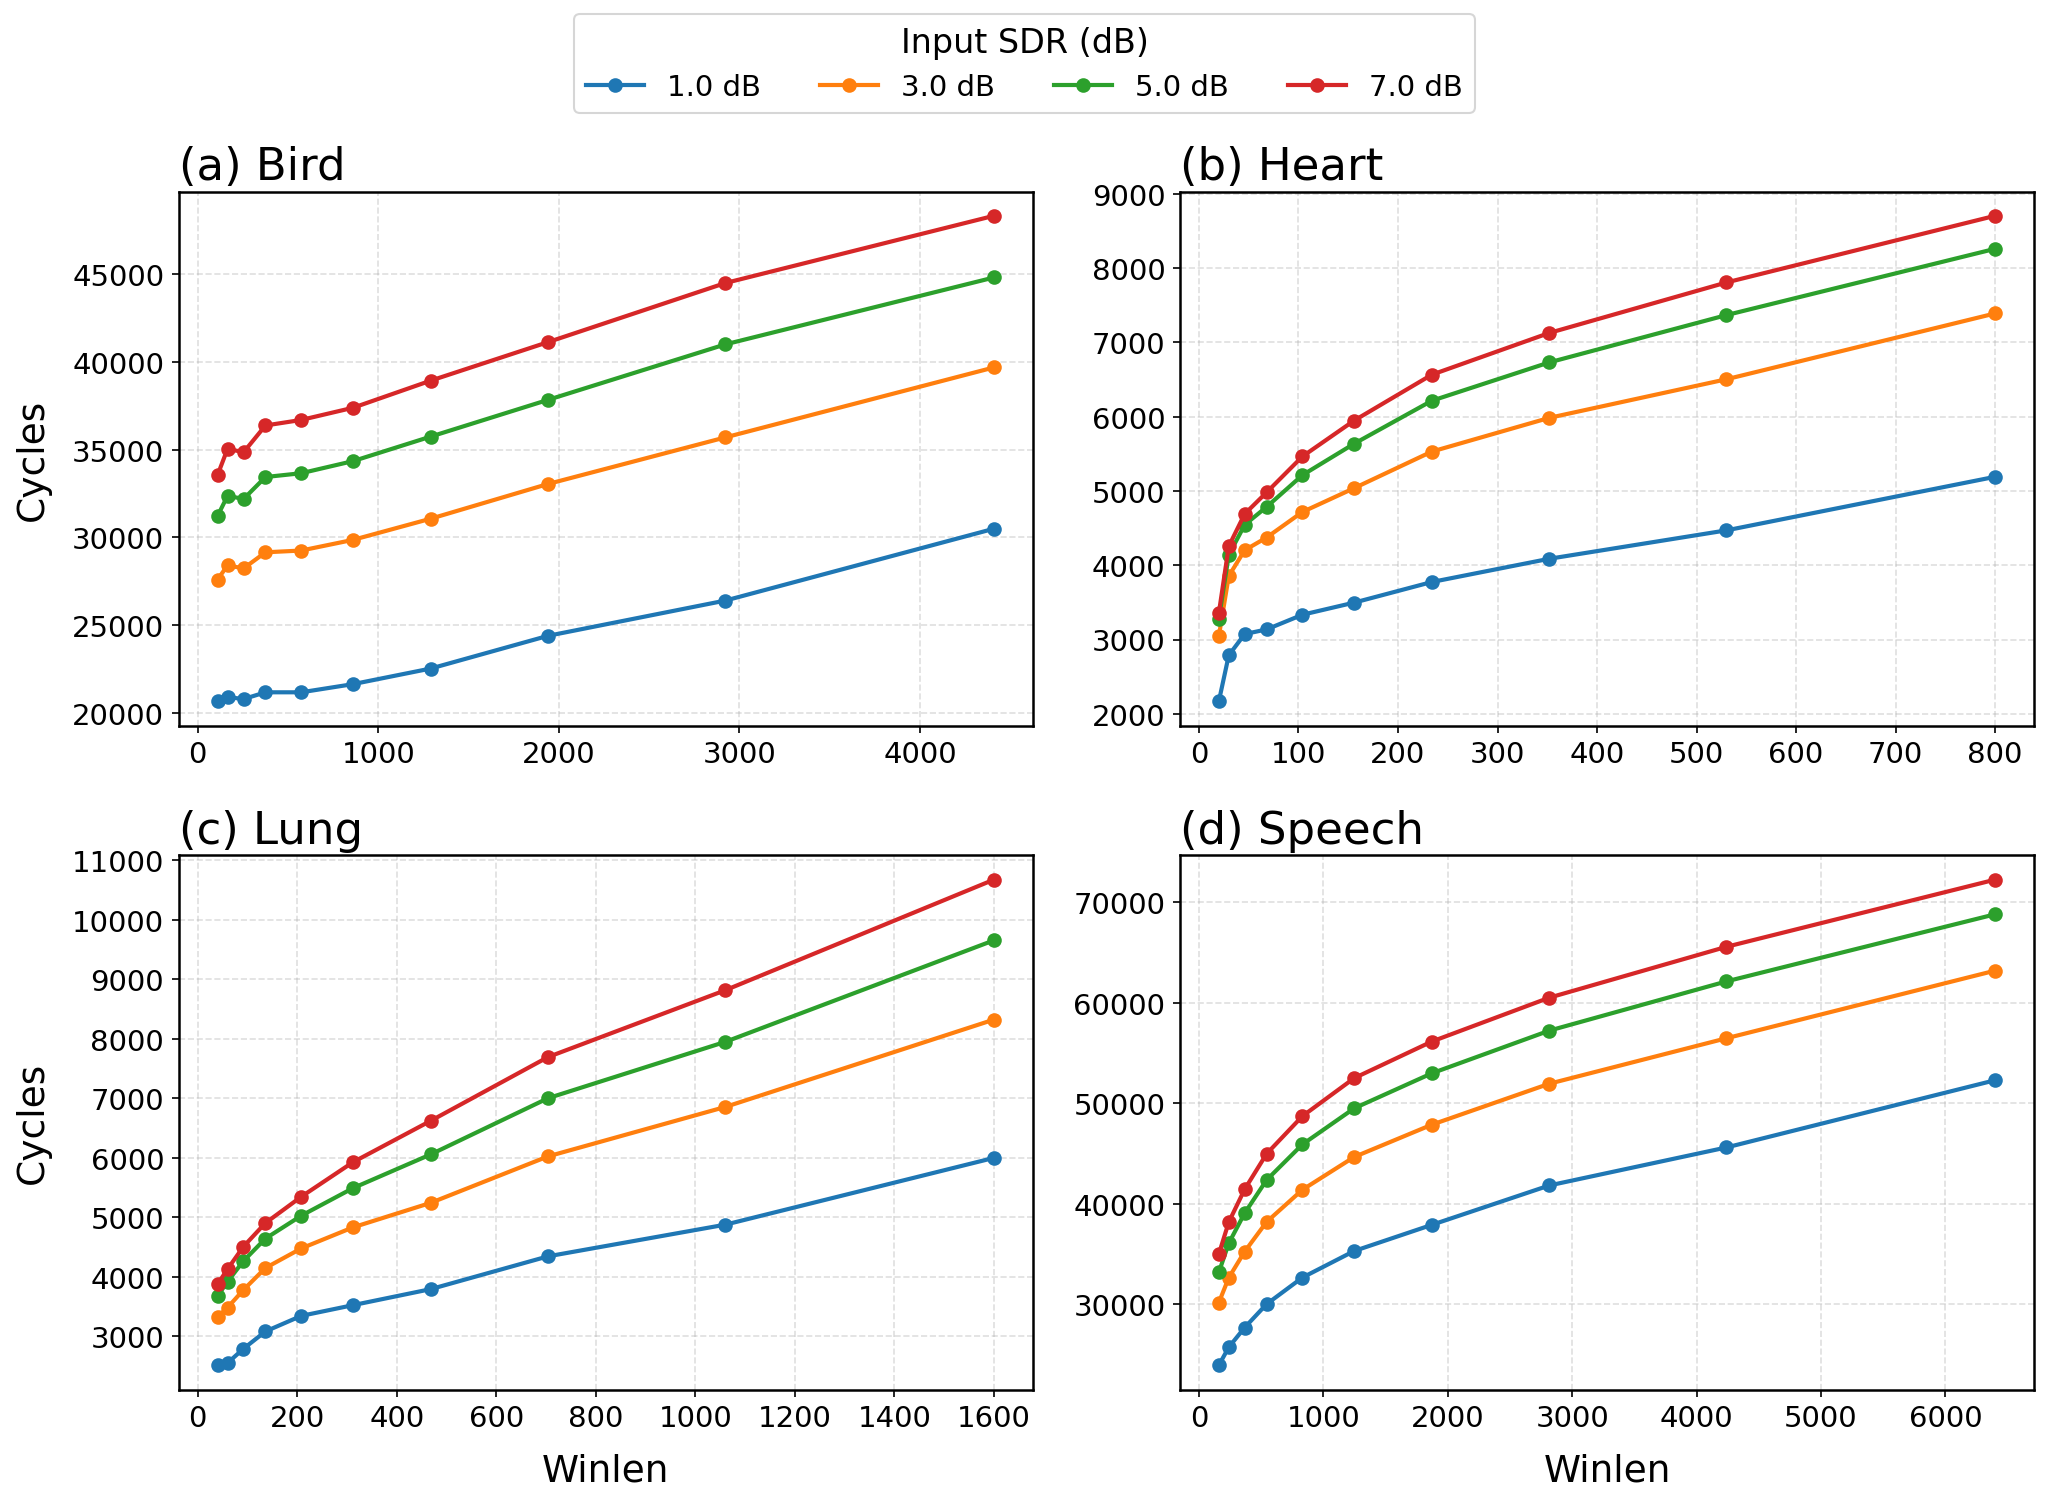

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# File paths
file_paths = {
    'Bird': '/data2/AAG/Audio_Declip/exp3_new/bird_sound/evaluation_results_baseline_model_SDR_timewise_len.xlsx',
    'Heart': '/data2/AAG/Audio_Declip/exp3_new/heart_sound/evaluation_results_baseline_model_SDR_timewise_len.xlsx',
    'Lung': '/data2/AAG/Audio_Declip/exp3_new/lung_sound/evaluation_results_baseline_model_SDR_timewise_len.xlsx',
    'Speech': '/data2/AAG/Audio_Declip/exp3_new/speech_sound/evaluation_results_baseline_model_SDR_timewise_len.xlsx'
}

# Plot settings
metrics = {
    'delta_sdr': 'ΔSDR (dB)',
    'processing_time': 'Processing Time (s)',
    'cycles': 'Cycles'
}

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
plt.rcParams.update({
    'font.size': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 12,
    'figure.dpi': 150,
    'axes.linewidth': 1.2,
    'axes.labelpad': 10
})

# Load datasets
datasets = {}
for label, path in file_paths.items():
    df = pd.read_excel(path)

    for col in ['delta_sdr', 'processing_time', 'cycles', 'sdr_orig', 'winlen', 'winlen']:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

    df['sdr_orig'] = df['sdr_orig'].round(1)
    df['sdr_orig_rounded'] = df['sdr_orig']

    datasets[label] = df

def plot_metric_lines():
    letters = ['(a)', '(b)', '(c)', '(d)']

    for metric, ylabel in metrics.items():
        fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=False, sharey=False)
        axes = axes.flatten()

        legend_handles_labels = {}

        for ax, (label, df), letter in zip(axes, datasets.items(), letters):
            sdr_levels = sorted(df['sdr_orig_rounded'].unique())
            winlens = sorted(df['winlen'].unique())

            for i, sdr in enumerate(sdr_levels):
                subset = df[df['sdr_orig_rounded'] == sdr]
                grouped = subset.groupby('winlen')[metric].mean()
                stds = subset.groupby('winlen')[metric].std()

                line, = ax.plot(
                    grouped.index,
                    grouped.values,
                    label=f'{sdr} dB',
                    marker='o',
                    linewidth=2,
                    color=colors[i % len(colors)]
                )
                # Optional: Add error shading
                # ax.fill_between(grouped.index, grouped.values - stds, grouped.values + stds, alpha=0.2,
                #                 color=colors[i % len(colors)])

                if f'{sdr} dB' not in legend_handles_labels:
                    legend_handles_labels[f'{sdr} dB'] = line

            ax.set_title(f"{letter} {label}", loc='left')
            ax.grid(True, linestyle='--', alpha=0.4)

        # Set axis labels
        axes[0].set_ylabel(ylabel)
        axes[2].set_ylabel(ylabel)
        axes[2].set_xlabel("Winlen")
        axes[3].set_xlabel("Winlen")

        # Add common legend at top
        handles = list(legend_handles_labels.values())
        labels_ = list(legend_handles_labels.keys())
        fig.legend(handles, labels_, loc='upper center', bbox_to_anchor=(0.5, 1.02), ncol=4,
                   fontsize=14, title="Input SDR (dB)", title_fontsize=16)

        # plt.suptitle(f'{ylabel} vs Winlen for Different SDR Levels', fontsize=20, y=1.08)
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()


# Call the function
plot_metric_lines()


# LibriData Evaluation

In [2]:
import pandas as pd

# File paths
baseline_file = "/data2/AAG/Audio_Declip/custom_output/evaluation_results_baseline_model.xlsx"
dynamic_file = "/data2/AAG/Audio_Declip/custom_output/evaluation_results_dynamic_model.xlsx"
ml_file = "/data2/AAG/Audio_Declip/custom_output/evaluation_results_ml_model.xlsx"

# Load data
df_baseline = pd.read_excel(baseline_file)
df_dynamic = pd.read_excel(dynamic_file)
df_ml = pd.read_excel(ml_file)

# Combine in a dict
models = {
    "Baseline": df_baseline,
    "Dynamic": df_dynamic,
    "ML": df_ml
}

# Metrics to summarize
metrics = ['delta_sdr', 'delta_pesq', 'processing_time', 'cycles']
thresholds = [0.1, 0.3]

# Print header
print(f"{'Threshold':<10} {'Model':<10} {'Delta SDR':<20} {'Delta PESQ':<20} {'Time (s)':<20} {'Cycles':<20}")

# Loop by threshold first
for threshold in thresholds:
    for model_name, df in models.items():
        group = df[df['threshold'] == threshold]
        values = []
        for metric in metrics:
            mean = group[metric].mean()
            std = group[metric].std()
            values.append(f"{mean:.2f} ({std:.2f})")
        print(f"{threshold:<10} {model_name:<10} {values[0]:<20} {values[1]:<20} {values[2]:<20} {values[3]:<20}")


Threshold  Model      Delta SDR            Delta PESQ           Time (s)             Cycles              
0.1        Baseline   18.33 (2.17)         1.01 (0.42)          4.76 (1.04)          36733.32 (8044.73)  
0.1        Dynamic    18.29 (2.10)         0.97 (0.43)          4.37 (0.92)          26530.55 (5652.93)  
0.1        ML         17.96 (2.20)         1.05 (0.40)          4.73 (0.75)          20777.75 (4455.39)  
0.3        Baseline   20.69 (4.07)         1.49 (0.55)          5.71 (1.02)          45176.12 (8067.86)  
0.3        Dynamic    20.66 (4.02)         1.48 (0.55)          5.27 (0.93)          32789.71 (5745.81)  
0.3        ML         21.03 (3.85)         1.53 (0.53)          5.32 (0.72)          25391.88 (4556.79)  


In [4]:
!python plot_loss_history.py --history_file /data2/AAG/Audio_Declip/saved_models/loss_history.json

Plots saved to loss_plots


# Extras

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# File paths
file_paths = {
    'Bird': '/data2/AAG/Audio_Declip/exp3_new/bird_sound/evaluation_results_baseline_model_SDR_timewise_len.xlsx',
    'Heart': '/data2/AAG/Audio_Declip/exp3_new/heart_sound/evaluation_results_baseline_model_SDR_timewise_len.xlsx',
    'Lung': '/data2/AAG/Audio_Declip/exp3_new/lung_sound/evaluation_results_baseline_model_SDR_timewise_len.xlsx',
    'Speech': '/data2/AAG/Audio_Declip/exp3_new/speech_sound/evaluation_results_baseline_model_SDR_timewise_len.xlsx'
}

# Load datasets
datasets = {}
for label, path in file_paths.items():
    df = pd.read_excel(path)

    for col in ['delta_sdr', 'processing_time', 'cycles', 'sdr_orig', 'winlen']:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

    df['sdr_orig'] = df['sdr_orig'].round(1)
    df['sdr_orig_rounded'] = df['sdr_orig']

    datasets[label] = df

# Function to analyze delta SDR for each window length across all SDR levels
def find_best_common_winlen():
    results = {}
    available_winlens = set()
    
    # Find all available window lengths across datasets
    for df in datasets.values():
        available_winlens.update(df['winlen'].unique())
    available_winlens = sorted(available_winlens)
    
    for audio_type, df in datasets.items():
        # Group by window length and original SDR
        grouped = df.groupby(['winlen', 'sdr_orig_rounded'])['delta_sdr'].mean().reset_index()
        
        # For each window length, calculate average delta SDR across all SDR levels
        winlen_performance = {}
        sdr_levels = sorted(df['sdr_orig_rounded'].unique())
        
        for winlen in available_winlens:
            winlen_data = grouped[grouped['winlen'] == winlen]
            
            if len(winlen_data) == len(sdr_levels):  # Only consider window lengths that have data for all SDR levels
                avg_delta_sdr = winlen_data['delta_sdr'].mean()
                min_delta_sdr = winlen_data['delta_sdr'].min()
                
                # Store performance metrics for this window length
                winlen_performance[winlen] = {
                    'avg_delta_sdr': avg_delta_sdr,
                    'min_delta_sdr': min_delta_sdr,
                    'delta_sdr_by_sdr': {row['sdr_orig_rounded']: row['delta_sdr'] for _, row in winlen_data.iterrows()}
                }
        
        # Find the window length with the highest average delta SDR
        if winlen_performance:
            best_winlen = max(winlen_performance.items(), key=lambda x: x[1]['avg_delta_sdr'])[0]
            results[audio_type] = {
                'best_common_winlen': best_winlen,
                'avg_delta_sdr': winlen_performance[best_winlen]['avg_delta_sdr'],
                'min_delta_sdr': winlen_performance[best_winlen]['min_delta_sdr'],
                'delta_sdr_by_sdr': winlen_performance[best_winlen]['delta_sdr_by_sdr'],
                'all_winlen_performance': winlen_performance
            }
    
    return results

# Function to find the best window length for each specific SDR level
def find_best_winlen_per_sdr():
    results = {}
    
    for audio_type, df in datasets.items():
        results[audio_type] = {}
        sdr_levels = sorted(df['sdr_orig_rounded'].unique())
        
        for sdr in sdr_levels:
            subset = df[df['sdr_orig_rounded'] == sdr]
            # Group by window length and find the one with max delta_sdr
            best_winlen = subset.groupby('winlen')['delta_sdr'].mean().idxmax()
            max_delta_sdr = subset.groupby('winlen')['delta_sdr'].mean().max()
            
            results[audio_type][sdr] = {
                'best_winlen': best_winlen,
                'max_delta_sdr': max_delta_sdr
            }
    
    return results

# Function to create a bar chart showing delta SDR for each window length
def plot_delta_sdr_by_winlen():
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.flatten()
    
    common_winlen_results = find_best_common_winlen()
    best_winlen_per_sdr = find_best_winlen_per_sdr()
    
    for i, (audio_type, df) in enumerate(datasets.items()):
        ax = axes[i]
        
        # Get all unique window lengths
        winlens = sorted(df['winlen'].unique())
        sdr_levels = sorted(df['sdr_orig_rounded'].unique())
        
        # Group by window length and calculate average delta SDR
        grouped = df.groupby(['winlen'])['delta_sdr'].mean().reset_index()
        
        # Plot bar chart
        bars = ax.bar(range(len(winlens)), [grouped[grouped['winlen'] == w]['delta_sdr'].values[0] for w in winlens])
        
        # Highlight the best common window length
        if audio_type in common_winlen_results:
            best_idx = winlens.index(common_winlen_results[audio_type]['best_common_winlen'])
            bars[best_idx].set_color('red')
            ax.text(best_idx, grouped[grouped['winlen'] == winlens[best_idx]]['delta_sdr'].values[0] + 0.1, 
                   f"Best\n{int(winlens[best_idx])}", ha='center', fontweight='bold')
        
        ax.set_title(f'{audio_type} Audio', fontsize=16)
        ax.set_xlabel('Window Length', fontsize=14)
        ax.set_ylabel('Average ΔSDR (dB)', fontsize=14)
        ax.set_xticks(range(len(winlens)))
        ax.set_xticklabels([int(w) for w in winlens], rotation=45)
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        
        # Add text at the top showing the best window length for each SDR level
        if audio_type in best_winlen_per_sdr:
            sdr_text = "Best winlen for each SDR level:\n"
            for sdr in sorted(sdr_levels):
                if sdr in best_winlen_per_sdr[audio_type]:
                    best_w = int(best_winlen_per_sdr[audio_type][sdr]['best_winlen'])
                    delta = round(best_winlen_per_sdr[audio_type][sdr]['max_delta_sdr'], 2)
                    sdr_text += f"SDR {sdr} dB: {best_w} (Δ: {delta} dB)\n"
            
            ax.text(0.98, 0.98, sdr_text, 
                   transform=ax.transAxes, 
                   verticalalignment='top', 
                   horizontalalignment='right',
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    plt.suptitle('Average ΔSDR by Window Length for Each Audio Type', y=1.02, fontsize=18)
    plt.show()

# Function to create a heatmap showing delta SDR for each window length and SDR level
def create_delta_sdr_heatmap():
    fig, axes = plt.subplots(2, 2, figsize=(18, 14))
    axes = axes.flatten()
    
    common_winlen_results = find_best_common_winlen()
    
    for i, (audio_type, df) in enumerate(datasets.items()):
        ax = axes[i]
        
        # Get unique window lengths and SDR levels
        winlens = sorted(df['winlen'].unique())
        sdr_levels = sorted(df['sdr_orig_rounded'].unique())
        
        # Create a matrix for the heatmap
        heatmap_data = np.zeros((len(winlens), len(sdr_levels)))
        
        # Fill the matrix with delta SDR values
        for wi, winlen in enumerate(winlens):
            for si, sdr in enumerate(sdr_levels):
                subset = df[(df['winlen'] == winlen) & (df['sdr_orig_rounded'] == sdr)]
                if not subset.empty:
                    heatmap_data[wi, si] = subset['delta_sdr'].mean()
        
        # Create heatmap
        im = ax.imshow(heatmap_data, cmap='viridis')
        
        # Add colorbar
        cbar = ax.figure.colorbar(im, ax=ax)
        cbar.set_label('Average ΔSDR (dB)')
        
        # Set ticks and labels
        ax.set_xticks(np.arange(len(sdr_levels)))
        ax.set_yticks(np.arange(len(winlens)))
        ax.set_xticklabels([f"{sdr} dB" for sdr in sdr_levels])
        ax.set_yticklabels([int(w) for w in winlens])
        
        # Rotate tick labels and set alignment
        plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
        
        # Highlight the best common window length
        if audio_type in common_winlen_results:
            best_winlen = common_winlen_results[audio_type]['best_common_winlen']
            best_idx = winlens.index(best_winlen)
            ax.axhline(y=best_idx, color='red', linestyle='-', linewidth=2, alpha=0.5)
            ax.text(-0.5, best_idx, f"Best: {int(best_winlen)}", 
                   verticalalignment='center', color='red', fontweight='bold')
        
        # Add annotations with delta SDR values
        for wi in range(len(winlens)):
            for si in range(len(sdr_levels)):
                if heatmap_data[wi, si] > 0:
                    text = ax.text(si, wi, f"{heatmap_data[wi, si]:.2f}",
                                 ha="center", va="center", 
                                 color="white" if heatmap_data[wi, si] > np.max(heatmap_data)/2 else "black",
                                 fontsize=9)
        
        ax.set_title(f'{audio_type} Audio', fontsize=16)
        ax.set_xlabel('Original SDR (dB)', fontsize=14)
        ax.set_ylabel('Window Length', fontsize=14)
    
    plt.tight_layout()
    plt.suptitle('ΔSDR (dB) by Window Length and Original SDR', y=1.02, fontsize=18)
    plt.show()

# Function to generate summary table of best common window lengths
def generate_best_common_winlen_table():
    common_winlen_results = find_best_common_winlen()
    best_winlen_per_sdr = find_best_winlen_per_sdr()
    
    # Create a dataframe for the summary table
    summary_data = []
    
    for audio_type in sorted(datasets.keys()):
        if audio_type in common_winlen_results:
            result = common_winlen_results[audio_type]
            
            # Get performance difference between best common winlen and optimal winlen for each SDR
            performance_loss = {}
            for sdr, data in best_winlen_per_sdr[audio_type].items():
                best_specific_delta = data['max_delta_sdr']
                common_delta = result['delta_sdr_by_sdr'].get(sdr, 0)
                performance_loss[sdr] = best_specific_delta - common_delta
            
            # Calculate average and maximum performance loss
            avg_loss = sum(performance_loss.values()) / len(performance_loss) if performance_loss else 0
            max_loss = max(performance_loss.values()) if performance_loss else 0
            
            summary_data.append([
                audio_type,
                int(result['best_common_winlen']),
                round(result['avg_delta_sdr'], 2),
                round(result['min_delta_sdr'], 2),
                round(avg_loss, 2),
                round(max_loss, 2)
            ])
    
    summary_df = pd.DataFrame(summary_data, columns=[
        'Audio Type', 
        'Best Common Window Length', 
        'Average ΔSDR (dB)', 
        'Minimum ΔSDR (dB)',
        'Avg Performance Loss (dB)',
        'Max Performance Loss (dB)'
    ])
    
    return summary_df

# Run the analyses
best_common_winlen_table = generate_best_common_winlen_table()
print("Best Common Window Length for Each Audio Type to Maximize ΔSDR:")
print(best_common_winlen_table)

# Create visualizations
plot_delta_sdr_by_winlen()
create_delta_sdr_heatmap()

# Generate detailed recommendation for each audio type
def generate_detailed_recommendations():
    common_winlen_results = find_best_common_winlen()
    best_winlen_per_sdr = find_best_winlen_per_sdr()
    
    print("\n=== DETAILED WINDOW LENGTH RECOMMENDATIONS FOR MAXIMUM ΔSDR ===\n")
    
    for audio_type in sorted(datasets.keys()):
        print(f"For {audio_type} Audio:")
        
        if audio_type in common_winlen_results:
            result = common_winlen_results[audio_type]
            best_common_winlen = int(result['best_common_winlen'])
            avg_delta_sdr = round(result['avg_delta_sdr'], 2)
            
            print(f"  • Best common window length: {best_common_winlen}")
            print(f"  • Average ΔSDR across all SDR levels: {avg_delta_sdr} dB")
            
            # Show ΔSDR for each SDR level using the common window length
            print(f"  • ΔSDR performance by original SDR level (using winlen={best_common_winlen}):")
            for sdr in sorted(result['delta_sdr_by_sdr'].keys()):
                delta = round(result['delta_sdr_by_sdr'][sdr], 2)
                print(f"    - SDR {sdr} dB: {delta} dB")
            
            # Compare with optimal window length for each SDR level
            print(f"\n  • Comparison with optimal window length for each SDR level:")
            for sdr in sorted(best_winlen_per_sdr[audio_type].keys()):
                best_specific = best_winlen_per_sdr[audio_type][sdr]
                best_specific_winlen = int(best_specific['best_winlen'])
                best_specific_delta = round(best_specific['max_delta_sdr'], 2)
                common_delta = round(result['delta_sdr_by_sdr'].get(sdr, 0), 2)
                loss = round(best_specific_delta - common_delta, 2)
                
                if best_specific_winlen == best_common_winlen:
                    print(f"    - SDR {sdr} dB: Common winlen {best_common_winlen} is optimal (ΔSDR: {common_delta} dB)")
                else:
                    print(f"    - SDR {sdr} dB: Optimal winlen {best_specific_winlen} (ΔSDR: {best_specific_delta} dB) vs Common winlen {best_common_winlen} (ΔSDR: {common_delta} dB) - Loss: {loss} dB")
        
        print()

# Generate detailed recommendations
generate_detailed_recommendations()
















import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# File paths
file_paths = {
    'Bird': '/data2/AAG/Audio_Declip/exp3/bird_sound/evaluation_results_baseline_model_SDR.xlsx',
    'Heart': '/data2/AAG/Audio_Declip/exp3/heart_sound/evaluation_results_baseline_model_SDR.xlsx',
    'Lung': '/data2/AAG/Audio_Declip/exp3/lung_sound/evaluation_results_baseline_model_SDR.xlsx',
    'Speech': '/data2/AAG/Audio_Declip/exp3/speech_sound/evaluation_results_baseline_model_SDR.xlsx'
}

# Plot settings
metrics = {
    'delta_sdr': 'ΔSDR (dB)',
    'processing_time': 'Processing Time (s)',
    'cycles': 'Cycles'
}

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
sdr_order = [1, 3, 5, 7]  # fixed SDR order

plt.rcParams.update({
    'font.size': 18,
    'axes.labelsize': 18,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'legend.fontsize': 14,
    'figure.dpi': 150,
    'axes.linewidth': 1.2,
    'axes.labelpad': 10
})

# Load datasets
datasets = {}
for label, path in file_paths.items():
    df = pd.read_excel(path)

    for col in ['delta_sdr', 'processing_time', 'cycles', 'sdr_orig', 'blocks', 'winlen']:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

    df['sdr_orig'] = df['sdr_orig'].round(1)
    datasets[label] = df

# Plotting
for metric, ylabel in metrics.items():
    fig, axs = plt.subplots(2, 2, figsize=(18, 12))
    axs = axs.flatten()

    for idx, (label, df) in enumerate(datasets.items()):
        ax = axs[idx]

        blocks_order = sorted(df['blocks'].unique())
        width = 0.15
        x = np.arange(len(blocks_order))

        grouped = df.groupby(['sdr_orig', 'blocks'])[metric].agg(['mean', 'std']).unstack()
        grouped_mean = grouped['mean']
        grouped_std = grouped['std']

        actual_sdrs = [s for s in sdr_order if s in grouped_mean.index]

        for i, sdr in enumerate(actual_sdrs):
            means = grouped_mean.loc[sdr].reindex(blocks_order).values
            stds = grouped_std.loc[sdr].reindex(blocks_order).values

            ax.bar(
                x + i * width,
                means,
                width,
                yerr=stds,
                label=f'SDR {sdr} dB',
                color=colors[i % len(colors)],
                capsize=4,
                edgecolor='black',
                linewidth=0.7
            )

        ax.set_xticks(x + width * len(actual_sdrs) / 2)
        ax.set_xticklabels(blocks_order, rotation=0)
        ax.set_ylabel(ylabel)
        ax.set_xlabel('Blocks')
        ax.set_title(f'{label}')
        ax.grid(True, linestyle='--', alpha=0.4)
        ax.legend(title='Input SDR')

    plt.suptitle(f'{ylabel} vs Blocks for Different Sound Types', fontsize=20)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()
